## Final Project Submission

Please Fill Out
* Student name: Chris Flynn 
* Student pace: flex
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

# Introduction
______
## Business Problem
___
Stakeholder: EdConsult - EdConsult is an educational consulting firm that works with local school boards and districts looking to convince residents to vote for increased school funding. 

Problem: EdConsult has been tasked to help King County School Districts prove to the public that an investment in education is an investment in the value of their property.  In order to accomplish this they need to be able to show that the School District, a home resides in,  is a leading predictor in the sale price of homes in King County.


![School Districts](images/SCHDST.jpg)
## Objectives
___
To create a multiple linear regression model to predict King County Washington house prices.  This model will help EdConsult help pursuade their clients into supporting their local school district in future elections:

The final model will aid in answering and supporting the following questions

1. What are the leading predictors of a houses sale price?
2. What effect does school district have on the sale price of a house?
3. Which school districts would be good places for EdConsult to target?


## Metrics
___
In order to validate that our model is succesful we will use the following metrics.

**P-values**  

p-values will be used to determine the validity of our models predictors using an alpha value of 0.05

During the iterative phase of model construction we will use predictors that have a p-value > alpha(0.05)

**Coefficients**

Coefficients will be used to explain the relationship between predictors(independent variables) and price(dependent variable) 

**Adjusted R-Squarred**

Adjusted R-Squarred will be used to evaluate the models ability to predict housing prices or prices per sqft.  A successful model will have an Adjusted r-squarred > .75

Adjusted R-Squarred will be more accurate than R-Squarred because it will account for the large number of predictors that will likely end up in our model.  

## Methodology
___
This study/notebook will follow the OSEMN Pipeline
* O — Obtaining our data
* S — Scrubbing / Cleaning our data
* E — Exploring / Visualizing 
* M — Modeling 
* N — Interpreting our data

# OBTAIN DATA
___

## Import Libraries
Importing the usual suspects to start.  Libraries will be added as needed.

In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## Primary Data Source
The bulk of our data will come from 'data/kc_house_data.csv'.  The details of the dataset are listed below.

## Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


## Need For More Data
After looking at the contents of the data above, one can see that there is no information on school district.  This data will need to be found elsewhere.  

Due to time and other contstraints a new dataframe will need to be created.  Given more time and resources, such as an api that could retrieve the school district, the following step would be done differently and be more precise. 

It is important to note that school district data will not be 100% accurate for all homes.  While this is an acknowledged limitation, its affects in this case will be limited as much as possible.  e

## Create DataFrame From The School District Data
'data/sd_freq_for_zipcode.csv' was created from http://proximityone.com/zip-sd.htm

The values for school districts are the percentages of houses for each zipcode that are in that school district.  Percentages were calculated using a spreadsheet and proximityone.com. The website provided school districts for each zipcode and the number of houses for each school district in that zipcode.  Those percentages will be used to predict the school district.

In [2]:
##create school ditrict freq dataframe
freq_df = pd.read_csv('data/sd_freq_for_zipcode.csv')
freq_df.head()

,District,Auburn,Bellevue,Enumclaw,Federal Way,Fife,Highline,Issaquah,Kent,Lake Washington,...,Renton,Riverview,Seattle,Shoreline,Skykomish,Snoqualmie Valley,Tahoma,Tukwila,Vashon Island,Total_Houses
0,98001,0.22802,0.000000,0.0,0.680327,0.088452,0.0,0.0,0.0032,0.000000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,1
1,98002,1.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,1
2,98003,0.00000,0.000000,0.0,0.987850,0.012150,0.0,0.0,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,1
3,98004,0.00000,0.958112,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.041888,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,1
4,98005,0.00000,0.970845,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.029155,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,1


## Renaming Column
the District column above needs to be renamed to zipcode, otherwise the new data frame looks good.

In [3]:
##rename District column to Zipcode
freq_df.rename(columns = {'District':'Zipcode'}, inplace = True)

In [4]:
## checking to see if the dataframe is now good to move forward.
freq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zipcode            70 non-null     int64  
 1   Auburn             70 non-null     float64
 2   Bellevue           70 non-null     float64
 3   Enumclaw           70 non-null     float64
 4   Federal Way        70 non-null     float64
 5   Fife               70 non-null     float64
 6   Highline           70 non-null     float64
 7   Issaquah           70 non-null     float64
 8   Kent               70 non-null     float64
 9   Lake Washington    70 non-null     float64
 10  Mercer Island      70 non-null     int64  
 11  Northshore         70 non-null     float64
 12  Renton             70 non-null     float64
 13  Riverview          70 non-null     float64
 14  Seattle            70 non-null     float64
 15  Shoreline          70 non-null     float64
 16  Skykomish          70 non-nu

## District - Zipcode Breakdown
Below we will look at the make up of each zipcode.

It will be important to see how each zipcode is divided amongst the school districts.
Zipcode - and all districts with their % of houses in that district.


In [5]:
#list of zipcodes
zips = [zipc for zipc in freq_df['Zipcode']]
#list of districts
dists = freq_df.columns.tolist()
dists.remove('Zipcode')
dists.remove('Total_Houses')

In [6]:
#print out district breakdown for each Zipcode
for i,zipc in enumerate(zips):
    #this creates a dictionary of all district percents for that zipcode
    dist_dict = freq_df[freq_df['Zipcode']==zipc].to_dict()
    #remove the districts that are 0%
    for dist in dists:
        nested_dict = dist_dict.get(dist,"")
        
        if nested_dict.get(i,"") <= 0:
            dist_dict.pop(dist,None)
    #get rid of 'Zipcode' and 'Total_Houses'
    dist_dict.pop('Zipcode')
    dist_dict.pop('Total_Houses')
    # create zip report to display information
    zip_report=''
    print(zipc)
    for key in dist_dict:
        print(key, round((dist_dict[key].get(i,'') * 100 ),2),'%')
    print('\n')




98001
Auburn 22.8 %
Federal Way 68.03 %
Fife 8.85 %
Kent 0.32 %


98002
Auburn 100.0 %


98003
Federal Way 98.78 %
Fife 1.22 %


98004
Bellevue 95.81 %
Lake Washington 4.19 %


98005
Bellevue 97.08 %
Lake Washington 2.92 %


98006
Bellevue 70.79 %
Issaquah 22.01 %
Renton 7.21 %


98007
Bellevue 97.86 %
Lake Washington 2.14 %


98008
Bellevue 97.2 %
Issaquah 2.8 %


98010
Auburn 0.2 %
Enumclaw 55.19 %
Kent 31.08 %
Tahoma 13.53 %


98011
Lake Washington 20.16 %
Northshore 79.84 %


98014
Riverview 89.81 %
Snoqualmie Valley 10.19 %


98019
Riverview 100.0 %


98022
Auburn 0.3 %
Enumclaw 99.7 %


98023
Federal Way 100.0 %


98024
Riverview 1.74 %
Snoqualmie Valley 98.26 %


98027
Bellevue 0.3 %
Issaquah 99.64 %
Tahoma 0.05 %


98028
Northshore 100.0 %


98029
Issaquah 100.0 %


98030
Kent 100.0 %


98031
Kent 100.0 %


98032
Auburn 0.15 %
Federal Way 30.21 %
Highline 5.58 %
Kent 64.02 %
Renton 0.05 %


98033
Bellevue 0.16 %
Lake Washington 99.84 %


98034
Lake Washington 95.97 %
Northshore

## District Breakdown
We can see from above which zipcodes will be affected the most by the assigning of school district by this technique.


## Function to Return School District 
This function will return a school district.  It requires a zipcode. The function will create 2 lists
1. list of possible districts
2. list of matching probabilities

Then it will select and return a school district using random.choice from the district list using the
probability list.

In [7]:
#numpy random seed
np.random.seed(18)
#function to choose a district given a zipcode
def get_district(zipc):
    #find the zipcode in the DataFrame
    df = freq_df.loc[freq_df.iloc[:,0].eq(zipc)]
    #drop columns Zipcode, Total_Houses
    df=df.drop(columns=['Zipcode','Total_Houses'])
    # dataframe to array 
    probs=df.to_numpy().flatten()
    #populate the lists
    probs_list = probs.tolist()
    dist_list=df.columns.tolist()
    #use random choice to pick a district using the two lists
    district = np.random.choice(dist_list, size = 1, p=probs_list)
    return ''.join(district)
get_district(98001)

'Federal Way'

## Run a Test on the Function
double checking that the function is working as intended.  Running the test 100 times to double check that the count
of a specific district will be close to the percentage listed in the probability table.

In [8]:
#test to see if the freq work 
results=[]
#numpy random seed
np.random.seed(18)
for i in range(100):
    results.append(get_district(98001))
res = results.count('Federal Way')
table = .680327 * 100
print('Federal Way value from table: {}\tValue from test: {}'.format(table,res))

Federal Way value from table: 68.0327	Value from test: 68


## Create DataFrame From kc_house_data.csv
'data/kc_house_data.csv' 

Now we can bring in our main dataframe and be prepared to add a district column.

In [9]:
kc_df = pd.read_csv('data/kc_house_data.csv')
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Create New Column 'District'
District column will be created by using the get_district function on all of the rows.

In [10]:
## run get_district(zip) on all rows
#numpy random seed
np.random.seed(44)
kc_df['district'] = kc_df.apply(lambda row : get_district(row['zipcode']), axis = 1)
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,district
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Northshore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Lake Washington


In [11]:
##create new dataframe without zipcode, lat, long
district_df = kc_df.drop(columns=['zipcode','lat','long']).copy()
district_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,district
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,2720,8062,Northshore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503,Lake Washington


# SCRUB
____
## Null and Odd Values

With a dataframe this large there will most likely be some missing or odd values that need to be addressed.

In [12]:
#explore dataframe
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  distri

It looks like  'waterfront', 'yr_renovated' are the only ones with null values.

In [13]:
#checkout waterfront
district_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Most homes in King County are not on the waterfront.  It can be safe to assume that if house was on the waterfront that this would be listed in the data. 

In [14]:
#checkout yr_renovated
district_df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

Null values in the 'yr_renovated column will be intepretted as never having been renovated.  3842 Homes have no record of being renovated.  Because they have never been renovated we will count the yr_built as the yr_renovated date.  This column will eventually be treated as categorical. 

In [15]:
##change all null values to 'NO'
district_df['waterfront'] = district_df['waterfront'].fillna('NO')
district_df['waterfront'].isna().value_counts()

False    21597
Name: waterfront, dtype: int64

In [16]:
##change the yr_renovated column to match yr_built if null
district_df['yr_renovated'] = district_df['yr_renovated'].fillna(district_df['yr_built'])
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  distri

In [17]:
#show all columns
pd.set_option('display.max_columns', None)
district_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,district
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,1933.0,2720,8062,Northshore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503,Lake Washington


It looks like the yr_renovated did not work.  It looks like the column type needs to be changed from float to int64


In [18]:
##change yr_renovated to int64
district_df['yr_renovated'] = district_df['yr_renovated'].astype('int64')
district_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,district
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0,1340,5650,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991,1690,7639,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,1933,2720,8062,Northshore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0,1360,5000,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0,1800,7503,Lake Washington


Now that we have changed the data type we can locate the 0 values and change the year renovated to the build year

In [19]:
##retry the yr_renovated using .loc
condition  = (district_df['yr_renovated'] == 0 )
district_df.loc[condition, 'yr_renovated'] = district_df['yr_built']
district_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,district
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,1955,1340,5650,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991,1690,7639,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,1933,2720,8062,Northshore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,1965,1360,5000,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,1987,1800,7503,Lake Washington


## Placeholders
That seems to have solved that issue.  Many of the homes were already listed with same year.  While looking at an expanded view of head there appear to be some columns with placeholder data.  The view column above shows an NaN.  It is worthwhile to check to see if common placeholders are used in any other columns as well.

In [20]:
##create common placeholder list
placeholders = ['-','?', '#', 'null', 'N/A', 'NaN']
##check kc_df columns for these values
district_df.isin(placeholders).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
district         False
dtype: bool

sqft_basement has these values.  - We can solve this issue and then address why that NaN did not show for view.
We can find the mode for sqft_basement.  I would assume that all missing data is for no basement and that 0 is most likely the mode.

In [21]:
##checking mode of sqft_basement
district_df['sqft_basement'].mode()

0    0.0
dtype: object

The mode is 0.  We can change the placeholders with 0


In [22]:
##change placeholders to 0 map - lambda function
#loop through placeholders list
for ph in placeholders:
    district_df['sqft_basement'] = district_df['sqft_basement'].map(lambda x: x.replace(ph,'0'))
district_df.isin(placeholders).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
district         False
dtype: bool

## Check Null


In [23]:
district_df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
sqft_living15     0
sqft_lot15        0
district          0
dtype: int64

The 'view' column still has 63 null values - 'NaN'.  
We can take a look at those below

In [24]:
#checking dataframe again.
district_df[district_df['view'].isnull()].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,district
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,Average,7 Average,1060,0.0,1963,1963,1650,9711,Highline
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,NO,NaN,Average,9 Better,2520,710.0,2001,2001,2640,8517,Federal Way
129,7853210060,4/6/2015,430000.0,4,2.50,2070,4310,2.0,NO,NaN,Average,7 Average,2070,0.0,2004,2004,1970,3748,Renton
205,3456000310,8/4/2014,840000.0,4,1.75,2480,11010,1.0,NO,NaN,Good,9 Better,1630,850.0,1966,1966,2770,10744,Mercer Island
487,1895000260,7/21/2014,207950.0,2,2.00,890,5000,1.0,NO,NaN,Average,6 Low Average,890,0.0,1917,1917,1860,5000,Seattle


In [25]:
#what are the value counts for view
district_df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [26]:
##change all the empty ones to None
condition  = (district_df['view'].isnull())
district_df.loc[condition, 'view'] = 'NONE'
district_df['view'].isnull().sum()# should return 0

0

In [27]:
#double check the value counts -  None should increase to 19485
district_df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

## Check Date Column For Range of Data
we can get the minimum and maximum dates to see what the range of data is that we are looking at.


In [28]:
##find date range of data
#change the date column to date time.
district_df['date'] = pd.to_datetime(district_df['date'])
#min - first date
min = district_df['date'].dt.date.min()
#max - last date
max =district_df['date'].dt.date.max()
print('The King County housing data was collected from {} to {}'.format(min,max))

The King County housing data was collected from 2014-05-02 to 2015-05-27


## Final Data Check Before Explore Phase
Double check to make sure that all of our datatypes are correct.
in the next step we can break down into continuos and categorical predictors, but it is best to see if anything looks off before moving on.


In [29]:
# check the datatypes / nulls
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

The date column changed when obtaining the range of data.  I will leave it that way for now, as it may help save time in the future.  

# Explore
____
In the explore phase it will be important to look at visualizations and find new features.

Plotting histograms for predictors is a great place to start


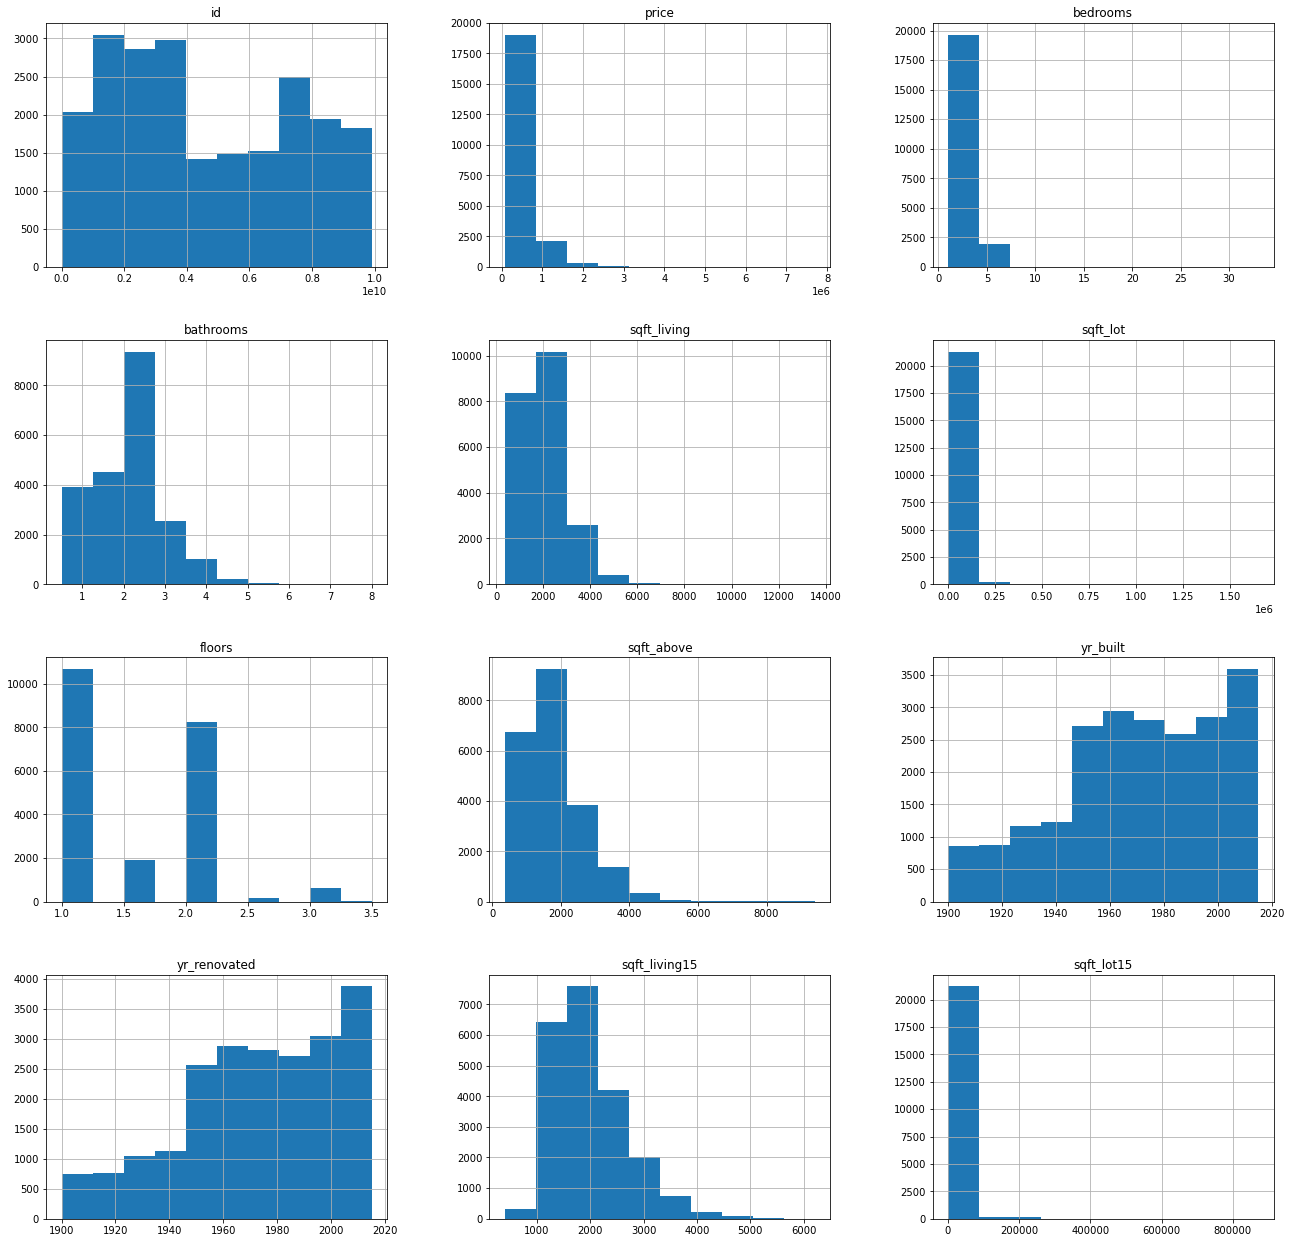

In [30]:
#histogram plotting
district_df.hist(figsize=(22,22))
plt.show()

## Histogram Analysis
Drop Id column
zipcode - categorical - could change datatype, but this will be added to categorical list.

In [31]:
#df_pairplot = sns.pairplot(kc_df)
#plt.savefig('pairplot_kc_df')
#![pairplot](images/pairplot_kc_df.png)

![pairplot](images/pairplot_kc_df.png)


Pairplots with this many predictors can be hard to deal with.  Going to separate categorical and continous, using type, and run on just continous.  Then get a better look at which predictors should be moved to categorical This is too hard to look at with this many predictors

## Dividing into 2 DataFrames
kc_cont will have all the continous - Dtype (int64,float64)
kc-cat will have all the categorical - Dtype !(int64,float64)

keep in mind that predictors will be moved after this step if shown to be categorical. 

In [32]:
##create kc_cont dataframe with numerical data
district_cont = district_df.select_dtypes(include=('float64','int64'))
district_cont.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,1955,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,1933,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,1965,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,1987,1800,7503


In [33]:
district_cat = district_df.select_dtypes(exclude=('float64','int64'))
district_cat.head()

,date,waterfront,view,condition,grade,sqft_basement,district
0,2014-10-13,NO,NONE,Average,7 Average,0.0,Seattle
1,2014-12-09,NO,NONE,Average,7 Average,400.0,Seattle
2,2015-02-25,NO,NONE,Average,6 Low Average,0.0,Northshore
3,2014-12-09,NO,NONE,Very Good,7 Average,910.0,Seattle
4,2015-02-18,NO,NONE,Average,8 Good,0.0,Lake Washington


In [34]:
#pairplot on kc_cont should be easier to read
#kc_cont_pairplot = sns.pairplot(kc_cont)
#plt.savefig('images/pairplot_kc_contdf')
#![pairplot](images/pairplot_kc_contdf.png)

![pairplot](images/pairplot_kc_contdf.png)

This is still hard to read variable names but many of continuous predictors seem to be categorical.  Zipcode, Floors, Bedrooms etc.. Unique Value Counts will be the best indicator.

## Get Unique Value Counts
get the unique value counts for the continuous variables.  low numbers will indicate a need to move into the categorical predictor group.

This is a good time to create column lists and to us .nunique()

In [35]:
#create list of categorical and continuous columns
cat_col =[col for col in district_cat]
cont_col = [col for col in district_cont]
print (cat_col, cont_col)


['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'district'] ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']


In [36]:
##Loop through cont_columns and return the column and the unique value using nunique()
for col in cont_col:
    print('Col: {}  --- Unique Values: {}'.format(col, district_cont[col].nunique()))

Col: id  --- Unique Values: 21420
Col: price  --- Unique Values: 3622
Col: bedrooms  --- Unique Values: 12
Col: bathrooms  --- Unique Values: 29
Col: sqft_living  --- Unique Values: 1034
Col: sqft_lot  --- Unique Values: 9776
Col: floors  --- Unique Values: 6
Col: sqft_above  --- Unique Values: 942
Col: yr_built  --- Unique Values: 116
Col: yr_renovated  --- Unique Values: 116
Col: sqft_living15  --- Unique Values: 777
Col: sqft_lot15  --- Unique Values: 8682


### Make Grade Column Continous
1. need to just get the number from the beginning of the grade 
2. create a new column and then drop the old one
3. move the new column to kc_cont


In [37]:
#rechecking 
district_cat.head()

,date,waterfront,view,condition,grade,sqft_basement,district
0,2014-10-13,NO,NONE,Average,7 Average,0.0,Seattle
1,2014-12-09,NO,NONE,Average,7 Average,400.0,Seattle
2,2015-02-25,NO,NONE,Average,6 Low Average,0.0,Northshore
3,2014-12-09,NO,NONE,Very Good,7 Average,910.0,Seattle
4,2015-02-18,NO,NONE,Average,8 Good,0.0,Lake Washington


In [38]:
#new column 
#disable warning- probably should find a better way...
pd.options.mode.chained_assignment = None  # default='warn'
district_cat['grade_num'] = [x[0] for x in district_cat['grade']]
district_cat = district_cat.drop(columns=['grade'])
district_cat.head()

,date,waterfront,view,condition,sqft_basement,district,grade_num
0,2014-10-13,NO,NONE,Average,0.0,Seattle,7
1,2014-12-09,NO,NONE,Average,400.0,Seattle,7
2,2015-02-25,NO,NONE,Average,0.0,Northshore,6
3,2014-12-09,NO,NONE,Very Good,910.0,Seattle,7
4,2015-02-18,NO,NONE,Average,0.0,Lake Washington,8


In [39]:
## move the grade_num to the kc_cont and then drop it from kc_cat
district_cont['grade'] = district_cat['grade_num']
district_cont.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,1955,1340,5650,7
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991,1690,7639,7
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,1933,2720,8062,6
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,1965,1360,5000,7
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,1987,1800,7503,8


In [40]:
##drop from kc_cat  -- also drop sqft basement. (keep forgetting that one)
district_cat = district_cat.drop(columns=['grade_num','sqft_basement'])
district_cat.head()

,date,waterfront,view,condition,district
0,2014-10-13,NO,NONE,Average,Seattle
1,2014-12-09,NO,NONE,Average,Seattle
2,2015-02-25,NO,NONE,Average,Northshore
3,2014-12-09,NO,NONE,Very Good,Seattle
4,2015-02-18,NO,NONE,Average,Lake Washington


In [41]:
district_cont.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,1955,1340,5650,7
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991,1690,7639,7
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,1933,2720,8062,6
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,1965,1360,5000,7
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,1987,1800,7503,8


## Feature Engineering - Age - Years Since Renovation

The 'yr_built' column will tell us how old the house is.  Replacing that column with an age column.  We will create a continuous predictor.  

The 'yr_renovated' column can be years since renovation.  

For both of these we will use the year 2016 as the current year as our data ends in May of 2015.


In [42]:
##create new column 'age' 

district_cont['age'] = district_cont.apply(lambda x: 2016 - x['yr_built'],axis=1)
district_cont.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,1955,1340,5650,7,61
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991,1690,7639,7,65
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,1933,2720,8062,6,83
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,1965,1360,5000,7,51
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,1987,1800,7503,8,29


In [43]:
#create new column 'yr_since_reno'
district_cont['yr_since_reno'] = district_cont.apply(lambda x: 2016 - x['yr_renovated'],axis=1)
district_cont.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,grade,age,yr_since_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,1955,1340,5650,7,61,61
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991,1690,7639,7,65,25
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,1933,2720,8062,6,83,83
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,1965,1360,5000,7,51,51
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,1987,1800,7503,8,29,29


In [44]:
#drop yr_built / yr_renovated
district_cont = district_cont.drop(columns = ['yr_built','yr_renovated'], axis=1)
district_cont.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade,age,yr_since_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650,7,61,61
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639,7,65,25
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,2720,8062,6,83,83
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000,7,51,51
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503,8,29,29


## Scatter Plot Continuous Variables - Price

In [45]:
#make sure we have continous columns list correct
cont_cols = district_cont.columns.tolist()
#remove first two id, price
del cont_cols[:2]
cont_cols




['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'grade',
 'age',
 'yr_since_reno']

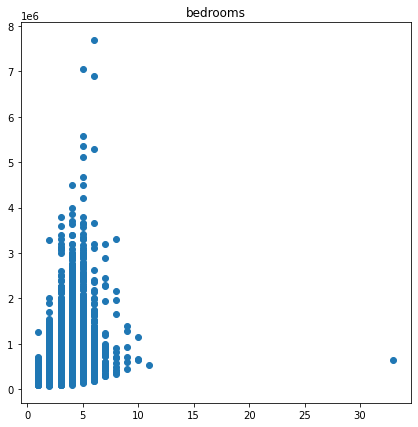

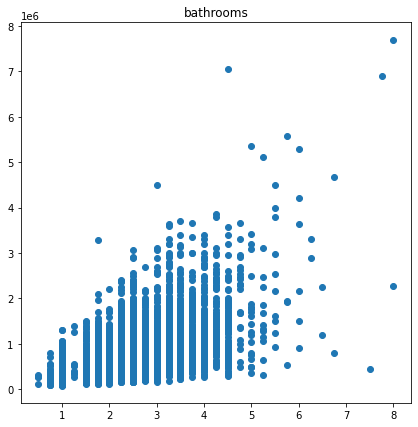

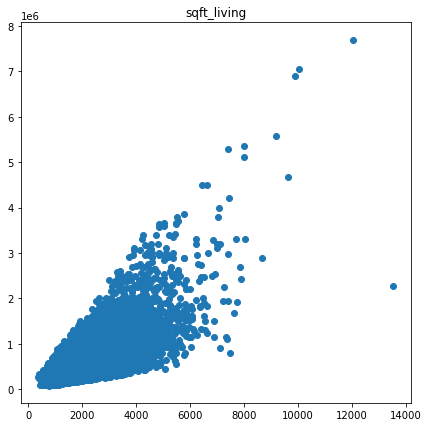

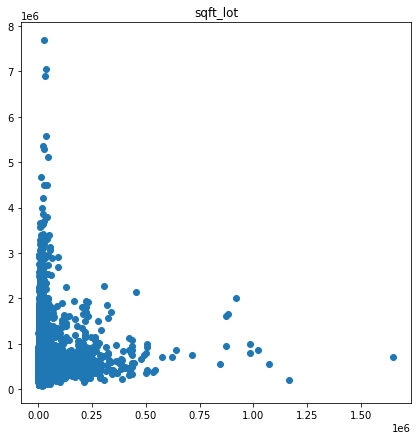

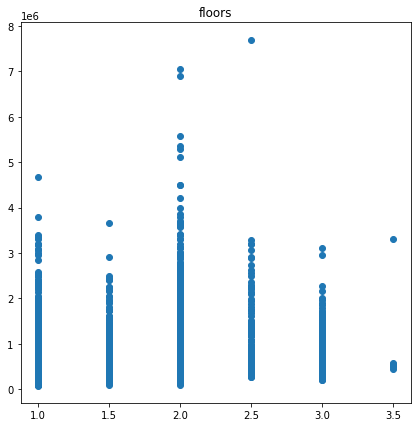

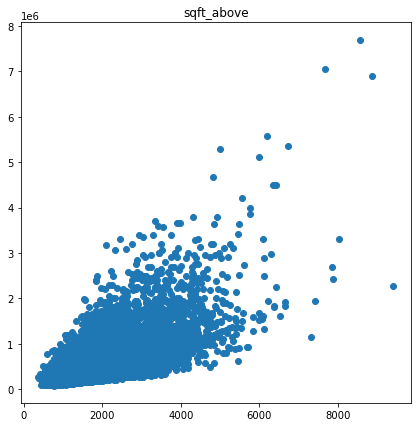

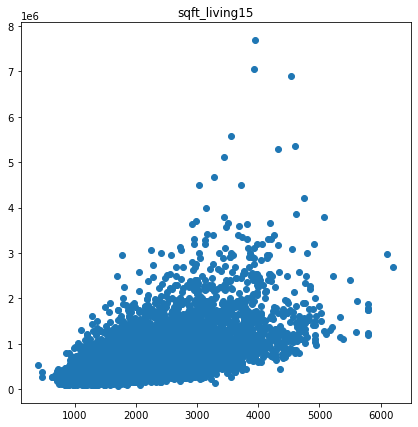

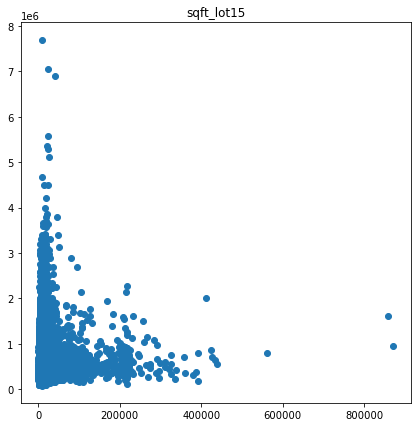

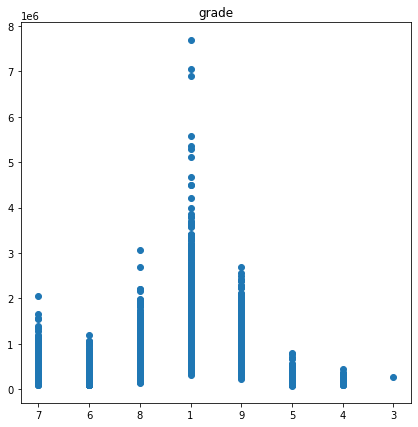

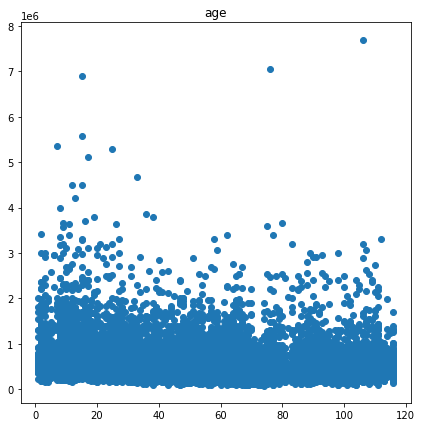

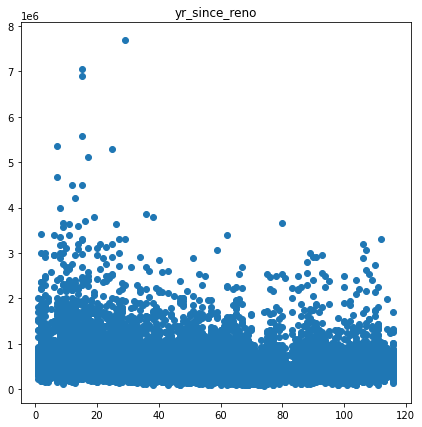

In [51]:
y = district_cont['price']
#Loop through cont_cols and create scatter plots
for i, col in enumerate(cont_cols):
    fig, ax = plt.subplots(figsize=(7,7))
    x = district_cont[col]
    plt.scatter(x=x,y=y, data=None)
    plt.title(x.name)


## Scatter Plot Analysis
Looking at the scatter plots we can see that 'sqft_living' will most likely have our strongest relationship.  

Zipcode Lat, and Long can probably be dropped as the location data they provide will be collinear with District.


The Continous Data is now ready for the modeling phase we 

## Handling Categorical Data
Now that we have the continous data set we can move on to the categorical data.  Onehotencoding the categorical variables will be necessary for them to be used in the model.

Below we can revist the kc_cat dataframe.

In [52]:
district_cat.head()

,date,waterfront,view,condition,district
0,2014-10-13,NO,NONE,Average,Seattle
1,2014-12-09,NO,NONE,Average,Seattle
2,2015-02-25,NO,NONE,Average,Northshore
3,2014-12-09,NO,NONE,Very Good,Seattle
4,2015-02-18,NO,NONE,Average,Lake Washington


## Choosing Predictors and Creating Dummies
We will ignore date for now.  Potentially breaking the date down at a later time.

sqft_basement should be dropped.  This was missed earlier.

below we will create a new dataframe with the other columns and create our dummies using pd.get_dummies(

In [53]:
## get_dummies creation
df_dummies = district_cat.drop(['date'],axis=1)

df_dummies.head()

,waterfront,view,condition,district
0,NO,NONE,Average,Seattle
1,NO,NONE,Average,Seattle
2,NO,NONE,Average,Northshore
3,NO,NONE,Very Good,Seattle
4,NO,NONE,Average,Lake Washington


In [54]:
#display unique values for each category
cols = df_dummies.columns
for col in cols:
    print('Category: {} Vales: {}'.format(col, district_cat[col].unique()))
    print('/n')

Category: waterfront Vales: ['NO' 'YES']
/n
Category: view Vales: ['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
/n
Category: condition Vales: ['Average' 'Very Good' 'Good' 'Poor' 'Fair']
/n
Category: district Vales: ['Seattle' 'Northshore' 'Lake Washington' 'Federal Way' 'Highline'
 'Tahoma' 'Bellevue' 'Riverview' 'Auburn' 'Shoreline' 'Mercer Island'
 'Kent' 'Issaquah' 'Renton' 'Vashon Island' 'Fife' 'Snoqualmie Valley'
 'Tukwila' 'Enumclaw']
/n


In [ ]:
df_dummies.info()

In [55]:
##commented this out because it is no longer needed as I switched these back to categorical
## I did however make the code more pythonic
'''
#Rewrite - with astype
string_cols = ['floors','bedrooms','bathrooms']
## change the datatypes of floors and bathrooms   
for c in string_cols:
    df_dummies[c] = df_dummies[c].astype(str)

df_dummies.info()
'''

"\n#Rewrite - with astype\nstring_cols = ['floors','bedrooms','bathrooms']\n## change the datatypes of floors and bathrooms   \nfor c in string_cols:\n    df_dummies[c] = df_dummies[c].astype(str)\n\ndf_dummies.info()\n"

## PD.get_dummies
pd.get_dummies will create a new boolean column for each unique response using the drop_first = True will eliminate the ability of a dummy trap.  

A dummy trap is collinearity effect.  
For example if 'waterfront' has two possibilities then the 'Yes' column can be dropped.  It is redundant to have to say that 'a property is on the waterfront and is also not not on the waterfront'.  

In [56]:
##columns to transform
transform = df_dummies.columns.tolist()
transform

['waterfront', 'view', 'condition', 'district']

In [57]:
##new dataframe with dummies
with_dummies = pd.get_dummies(data=df_dummies, columns=transform, drop_first=True)
with_dummies.head()

,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Enumclaw,district_Federal Way,district_Fife,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Evaluate Our Separated Datasets
They seem to be split according to our specifications.  We can now combine them and begin constructing our Baseline Model.

## Combine Dataframes
with_dummies has the dummies columns
final_cont has the categorical data


In [58]:
district_cont.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade,age,yr_since_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650,7,61,61
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639,7,65,25
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,2720,8062,6,83,83
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000,7,51,51
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503,8,29,29


In [59]:
#new dataframe will join both
df = district_cont.join(with_dummies)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade,age,yr_since_reno,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Enumclaw,district_Federal Way,district_Fife,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650,7,61,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639,7,65,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,2720,8062,6,83,83,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000,7,51,51,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503,8,29,29,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
##check to see that we still have the same number of houses
rows, cols = df.shape
original_rows, original_cols = kc_df.shape
print('The original table had {} houses, the new table has {} houses'.format(original_rows, rows))

The original table had 21597 houses, the new table has 21597 houses


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21597 non-null  int64  
 1   price                       21597 non-null  float64
 2   bedrooms                    21597 non-null  int64  
 3   bathrooms                   21597 non-null  float64
 4   sqft_living                 21597 non-null  int64  
 5   sqft_lot                    21597 non-null  int64  
 6   floors                      21597 non-null  float64
 7   sqft_above                  21597 non-null  int64  
 8   sqft_living15               21597 non-null  int64  
 9   sqft_lot15                  21597 non-null  int64  
 10  grade                       21597 non-null  object 
 11  age                         21597 non-null  int64  
 12  yr_since_reno               21597 non-null  int64  
 13  waterfront_YES              215

In [62]:
#grade needs to be int64
df['grade'] = df['grade'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21597 non-null  int64  
 1   price                       21597 non-null  float64
 2   bedrooms                    21597 non-null  int64  
 3   bathrooms                   21597 non-null  float64
 4   sqft_living                 21597 non-null  int64  
 5   sqft_lot                    21597 non-null  int64  
 6   floors                      21597 non-null  float64
 7   sqft_above                  21597 non-null  int64  
 8   sqft_living15               21597 non-null  int64  
 9   sqft_lot15                  21597 non-null  int64  
 10  grade                       21597 non-null  int64  
 11  age                         21597 non-null  int64  
 12  yr_since_reno               21597 non-null  int64  
 13  waterfront_YES              215

## Data Visualizations 
Now that we have all of our data we can look at some visualizations  



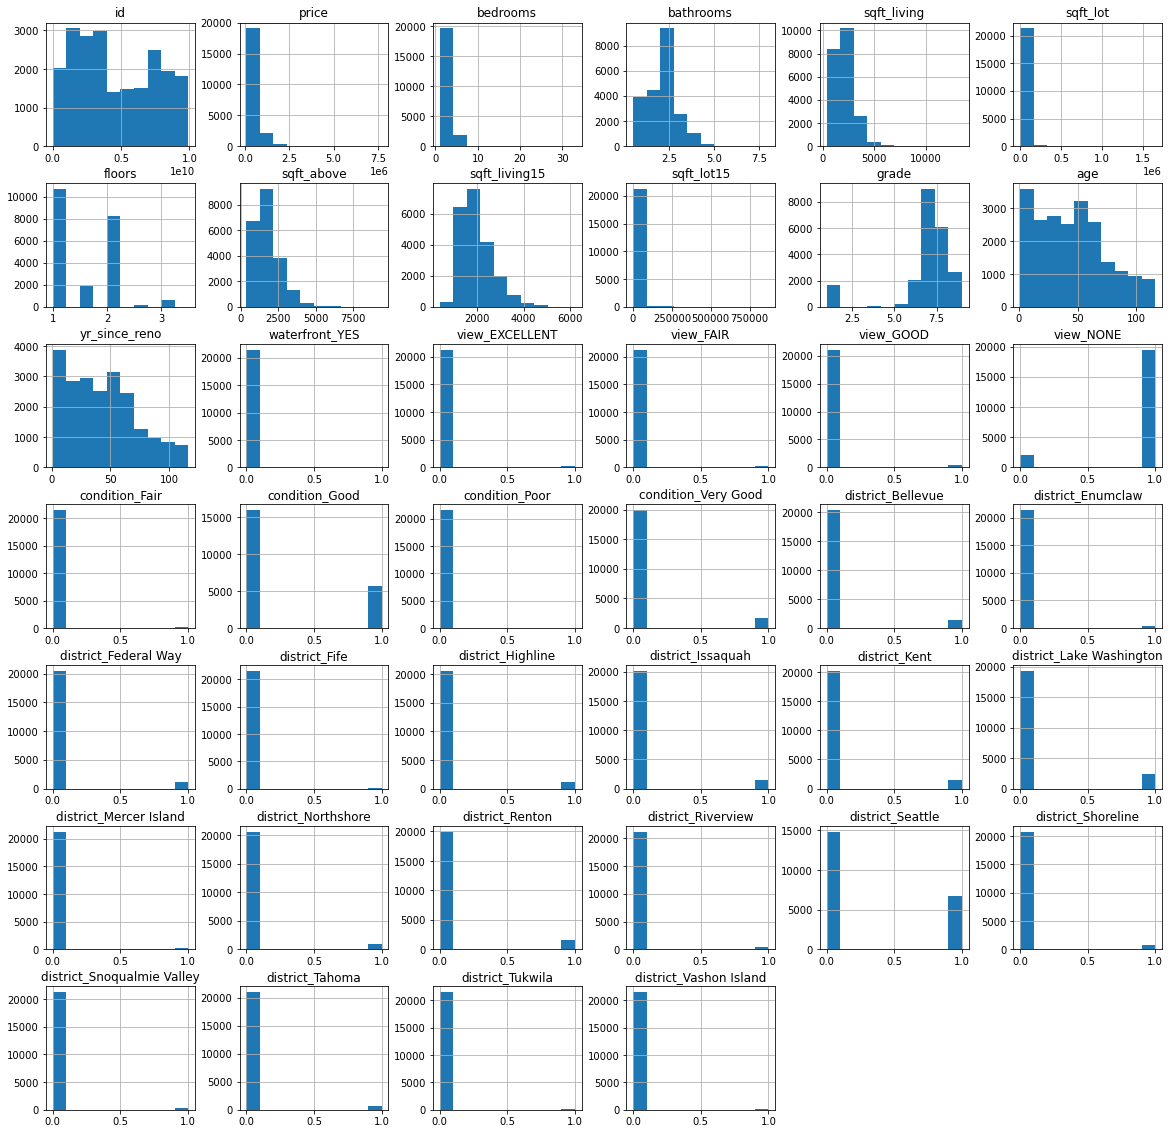

In [63]:
## histograms
df.hist(figsize=(20,20))
plt.show()

## School District
Below we have an overlay of School District an Zip Codes to give a general idea of the areas of each School Disrict in the county.  Remember we have accounted for zipcode in our district dummy variables.

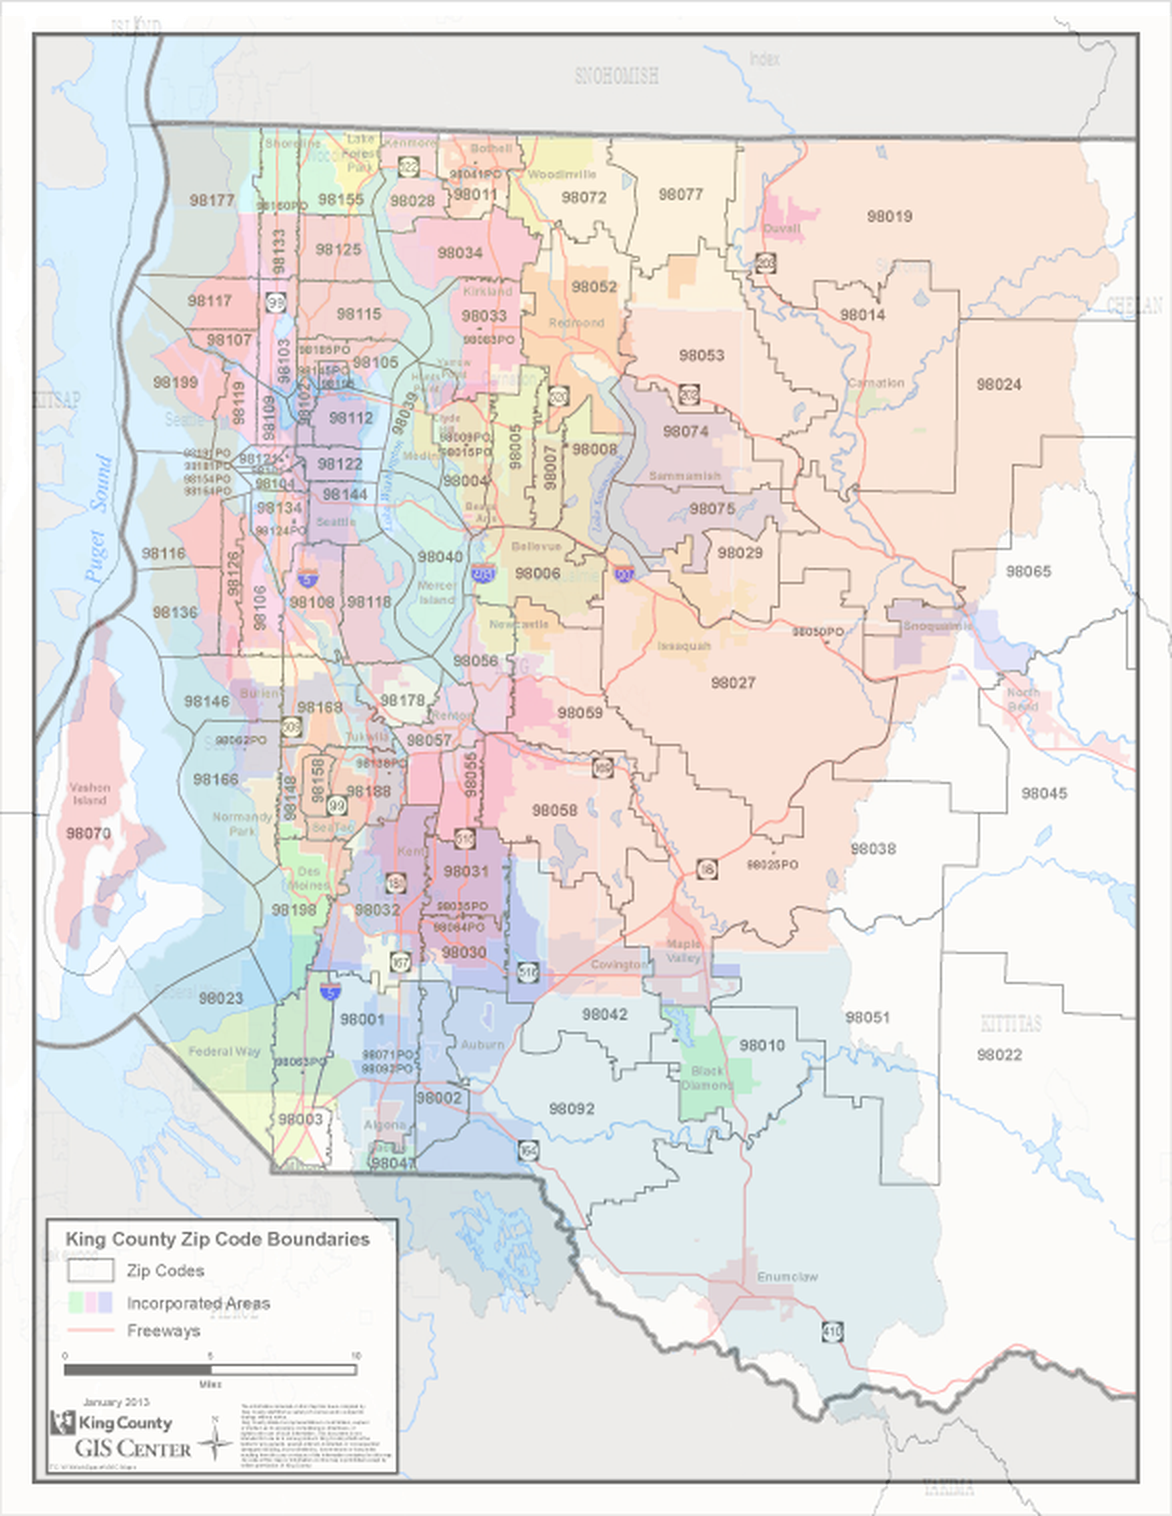

In [64]:
#import images from Pillow
from PIL import Image

#make the zipcode code image the background image
imbg = Image.open("images/zipcodesgif.gif").convert("RGBA")
#make the school district map the foreground image
imfg = Image.open("images/SCHDST.JPG").convert("RGBA")
#change the alpha of the overlayed foreground image. 
imfg.putalpha(80)
#get the width and height from the background image
imbg_width, imbg_height = imbg.size
#resize the foregraound image to match the background image
imfg_resized = imfg.resize((imbg_width, imbg_height), Image.LANCZOS)
imbg.paste(imfg_resized, (0,8), imfg_resized)
imbg = imbg.resize((imbg_width*2,imbg_height*2), Image.LANCZOS)
imbg

## Plot the houses with lat and long to see where they fall on the map

Text(0.5, 1.0, 'King County Prices by Location')

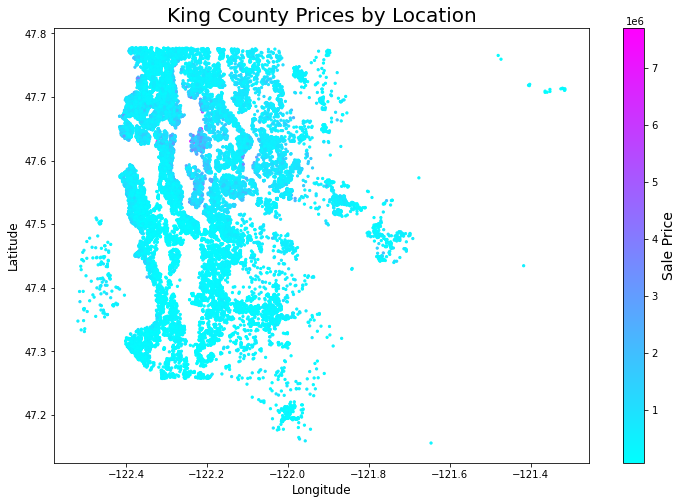

In [65]:
##
plt.figure(figsize=(12,8))
plt.scatter(kc_df.long, kc_df.lat ,c=kc_df.price, cmap = 'cool', s=5)
plt.colorbar().set_label('Sale Price', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('King County Prices by Location', fontsize=20)

#plt.show()

In [66]:
kc_df.groupby(['district'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Auburn,641.0,2.970239e+05,112957.090210,90000.0,225000.0,275000.0,339100.00,930000.0
Bellevue,1297.0,9.450229e+05,645098.666402,247500.0,552000.0,753000.0,1070000.00,7060000.0
Enumclaw,292.0,3.324402e+05,141314.896793,122000.0,240000.0,286000.0,370000.00,902500.0
Federal Way,1117.0,2.859120e+05,104235.073234,86500.0,225000.0,265000.0,318000.00,1280000.0
Fife,37.0,2.923739e+05,87393.108624,154000.0,220000.0,274950.0,338500.00,510000.0
Highline,1077.0,3.405639e+05,209184.872862,81000.0,228900.0,285000.0,384500.00,2510000.0
Issaquah,1455.0,6.557806e+05,306504.378365,130000.0,475000.0,602000.0,765000.00,4210000.0
Kent,1418.0,3.151135e+05,108032.499577,85000.0,250000.0,299000.0,358375.00,1500000.0
Lake Washington,2318.0,6.628160e+05,332051.447680,90000.0,460625.0,590000.0,769998.75,5110000.0


In [67]:
#use the above data to create a new dataframe with aggregate data for price
sd_grouped = kc_df.groupby('district').agg({'price': ['mean', 'min', 'max']})
sd_grouped.sort_values(by=[('price','mean')],ascending=False)

price                     
                           mean       min        max
district                                            
Mercer Island      1.194874e+06  500000.0  5300000.0
Bellevue           9.450229e+05  247500.0  7060000.0
Lake Washington    6.628160e+05   90000.0  5110000.0
Issaquah           6.557806e+05  130000.0  4210000.0
Seattle            5.899350e+05   89950.0  7700000.0
Northshore         5.423131e+05  160000.0  1920000.0
Snoqualmie Valley  4.908943e+05   80000.0  1950000.0
Vashon Island      4.893820e+05  160000.0  1380000.0
Riverview          4.770309e+05  119500.0  1940000.0
Shoreline          4.493405e+05  130000.0  4500000.0
Renton             4.281010e+05   90000.0  3300000.0
Tahoma             3.651757e+05  110000.0  1350000.0
Highline           3.405639e+05   81000.0  2510000.0
Enumclaw           3.324402e+05  122000.0   902500.0
Kent               3.151135e+05   85000.0  1500000.0
Auburn             2.970239e+05   90000.0   930000.0
Fife               2.923739e+05  154000.0   510000.0
Federal Way        2.859120e+05   86500.0  1280000.0
Tukwila            2.451457e+05   78000.0   600000.0

There data above does show that there is some relationship between district and price.  Let's create a boxplot to visualize the diffences

<function matplotlib.pyplot.show(close=None, block=None)>

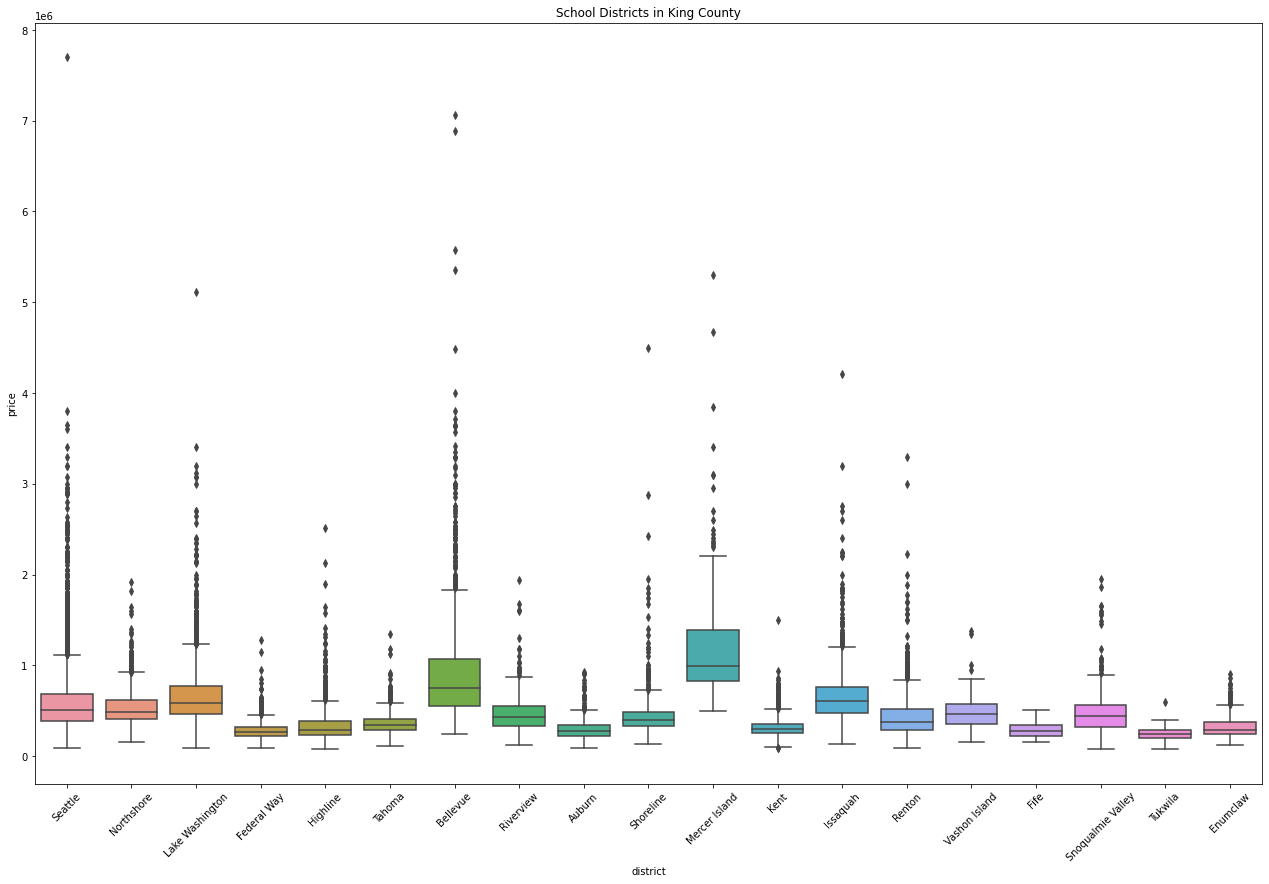

In [68]:
#Boxplots for each school disrict
fig, ax = plt.subplots(figsize=(22,14))
ax = sns.boxplot(x='district', y='price', data=kc_df,)
ax.set_title('School Districts in King County')
plt.xticks(rotation=45)
plt.show

We can see that Mercer Island, Bellevue and Lake Washington have the highest sale price and Auburn, Federal Way, Tukwila have the lowest sale price.  This information can be used by the client to help narrow down which areas they should focus on.

We also can see that we have some outliers.  We can look further into the outliers below

## Outliers
let see what percentage of houses are above 1 million, 1.5 million and 2 million


In [69]:

# total number of houses in the list
total_houses = len(kc_df)
#prices divided by 1 million
prices_div_mil = kc_df.price/ 10**6
## find percent over thresholds 
over_1_mil = (len([num for num in prices_div_mil if num > 1]) / total_houses) *100
over_1pt5_mil = (len([num for num in prices_div_mil if num > 1.5]) / total_houses) *100
over_2_mil = (len([num for num in prices_div_mil if num > 2]) / total_houses) * 100
print('Over 1 Mil: ' ,round(over_1_mil,2), '% Over 1.5 Mil: ', round(over_1pt5_mil,2), '% Over 2 Mil: ',round(over_2_mil,2),'%')

Over 1 Mil:  6.75 % Over 1.5 Mil:  2.39 % Over 2 Mil:  0.92 %


It looks like less than 1% of the homes are over 2 million.  Lets look at the district breakdown without those homes included
## Price Outliers Removed
removing all homes over 2 million dollars from kc_df 
then regroup and box plot the data again.  

In [70]:
kc_df_no_outliers = kc_df[kc_df.price < 2*10**6]
kc_df_no_outliers.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,district
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Northshore
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Lake Washington


In [71]:
##check the shape should be smaller now...
kc_df_no_outliers.shape

(21389, 22)

Now let's look at the box plot without houses over 2 million dollars


<function matplotlib.pyplot.show(close=None, block=None)>

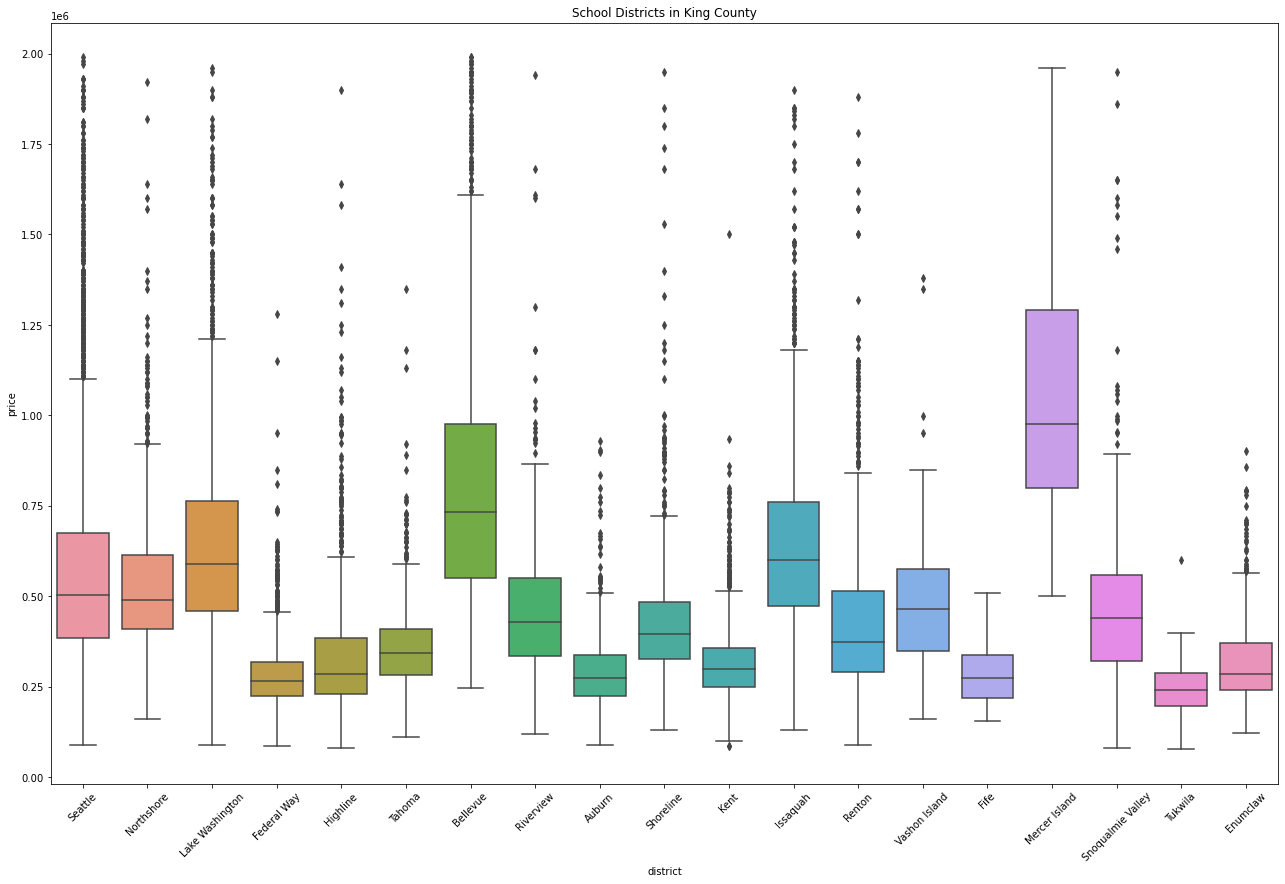

In [72]:
#Boxplots for each school disrict
fig, ax = plt.subplots(figsize=(22,14))
ax = sns.boxplot(x='district', y='price', data=kc_df_no_outliers,)
ax.set_title('School Districts in King County')
plt.xticks(rotation=45)
plt.show

Removing those outliers makes the differences in districts more evident.  Those house can be removed from the data.


## Removing Outliers From the combined data frame
our combined dataframe is called df.  
below we will remove all the outliers before we move on.

In [73]:
##remove outliers from df
df = df[df.price < 2*10**6]
df.shape

(21389, 40)

## Client Questions Update
____

1. What are the leading factors in predicting the sale price of a home?

We are prepared to run linear regression models on our data.  We will then use coefficients to determine which predictors have the greatest impact.  Based on initial visualizations sqft_living seems to be a good prediction.

2. How does school district affect the sale price of the home?

Once we have the leading factors we can see where school district ranks amoung them.

3. What school districts should be targeted during the next election?

Then we will be able to recommend which school districts would make good potential targets in the upcoming election.

## Linear Regression Assumptions

* check for Linearity
* check for Multicollinearity
* check for Homoscedasticity


## Linearity 
Check linearity with jointplots.
We should see linear relationships between predictors and price


## Multicollinearity
use .corr() in a heatmap

<AxesSubplot:>

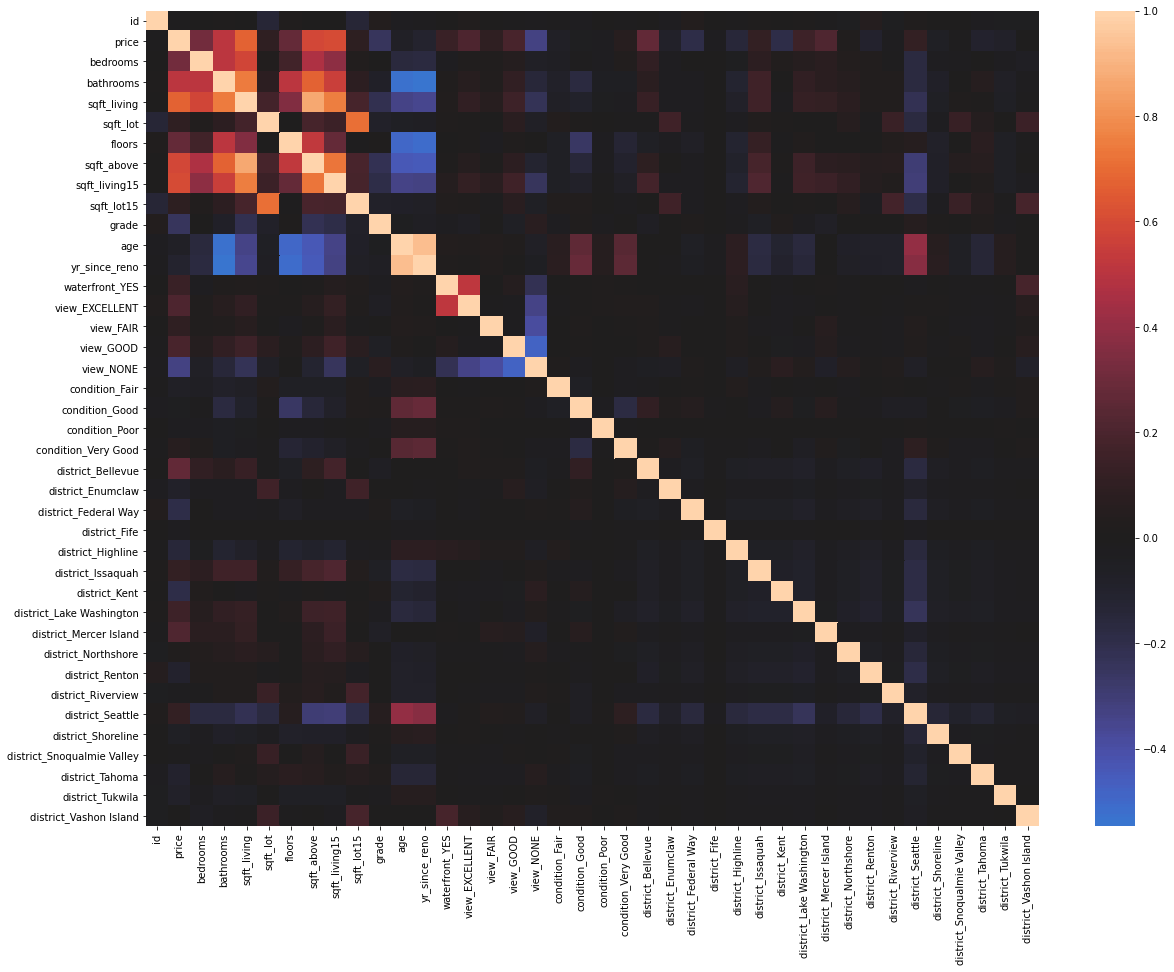

In [74]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), center=0)

We have some multicollinearity as expected with all predictors dealing with sqft -
We also see some between age of home and yr since renovation as expected.

some of these will be eliminated during iterative modeling process

## Homoscedasticity
check this after running model.

# Model
___

Baseline Model built with Sci_Kit Learn
separate into X(predictors) and y(price)

Import:

**from** sklearn.model_selection **import** train_test_split
**from** sklearn.linear_model **import** LinearRegresion
Then
create Train Test Split

In [75]:
#Import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
# X and y set up
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df[['price']] # dataframe only price


## Train/Test
Train test split using 80/20

In [77]:
#Perform Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#check lengths to verify split
print('Value should be close to 4 (80/20): ',len(X_train) / len(X_test))




Value should be close to 4 (80/20):  3.9997662459093033


In [78]:
y_train

,price
4829,550000.0
5808,569500.0
10183,471000.0
12297,270000.0
942,971000.0
...,...
11384,299880.0
12071,355000.0
5447,299950.0
872,795000.0


## Visualize Distribution of Target Variable
price

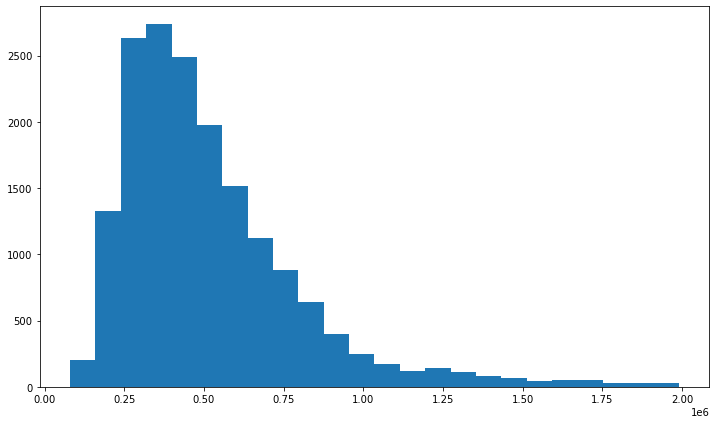

In [79]:
fig, ax = plt.subplots(figsize=(12,7))

ax.hist(y_train['price'], bins=24)
#ax.set_xlabel("Sale Price (USD)")
#ax.set_ylabel("Number of Houses")
#ax.set_title("King County Home Sales - 5/2014 - 5/2015");
plt.show()

## Correlation Table with Predictors and Price
creating another heatmap to show relationship of predictors to price in our Train data.

Text(0.5, 1.0, 'Correalation Heat Map - Between Predictors and Price')

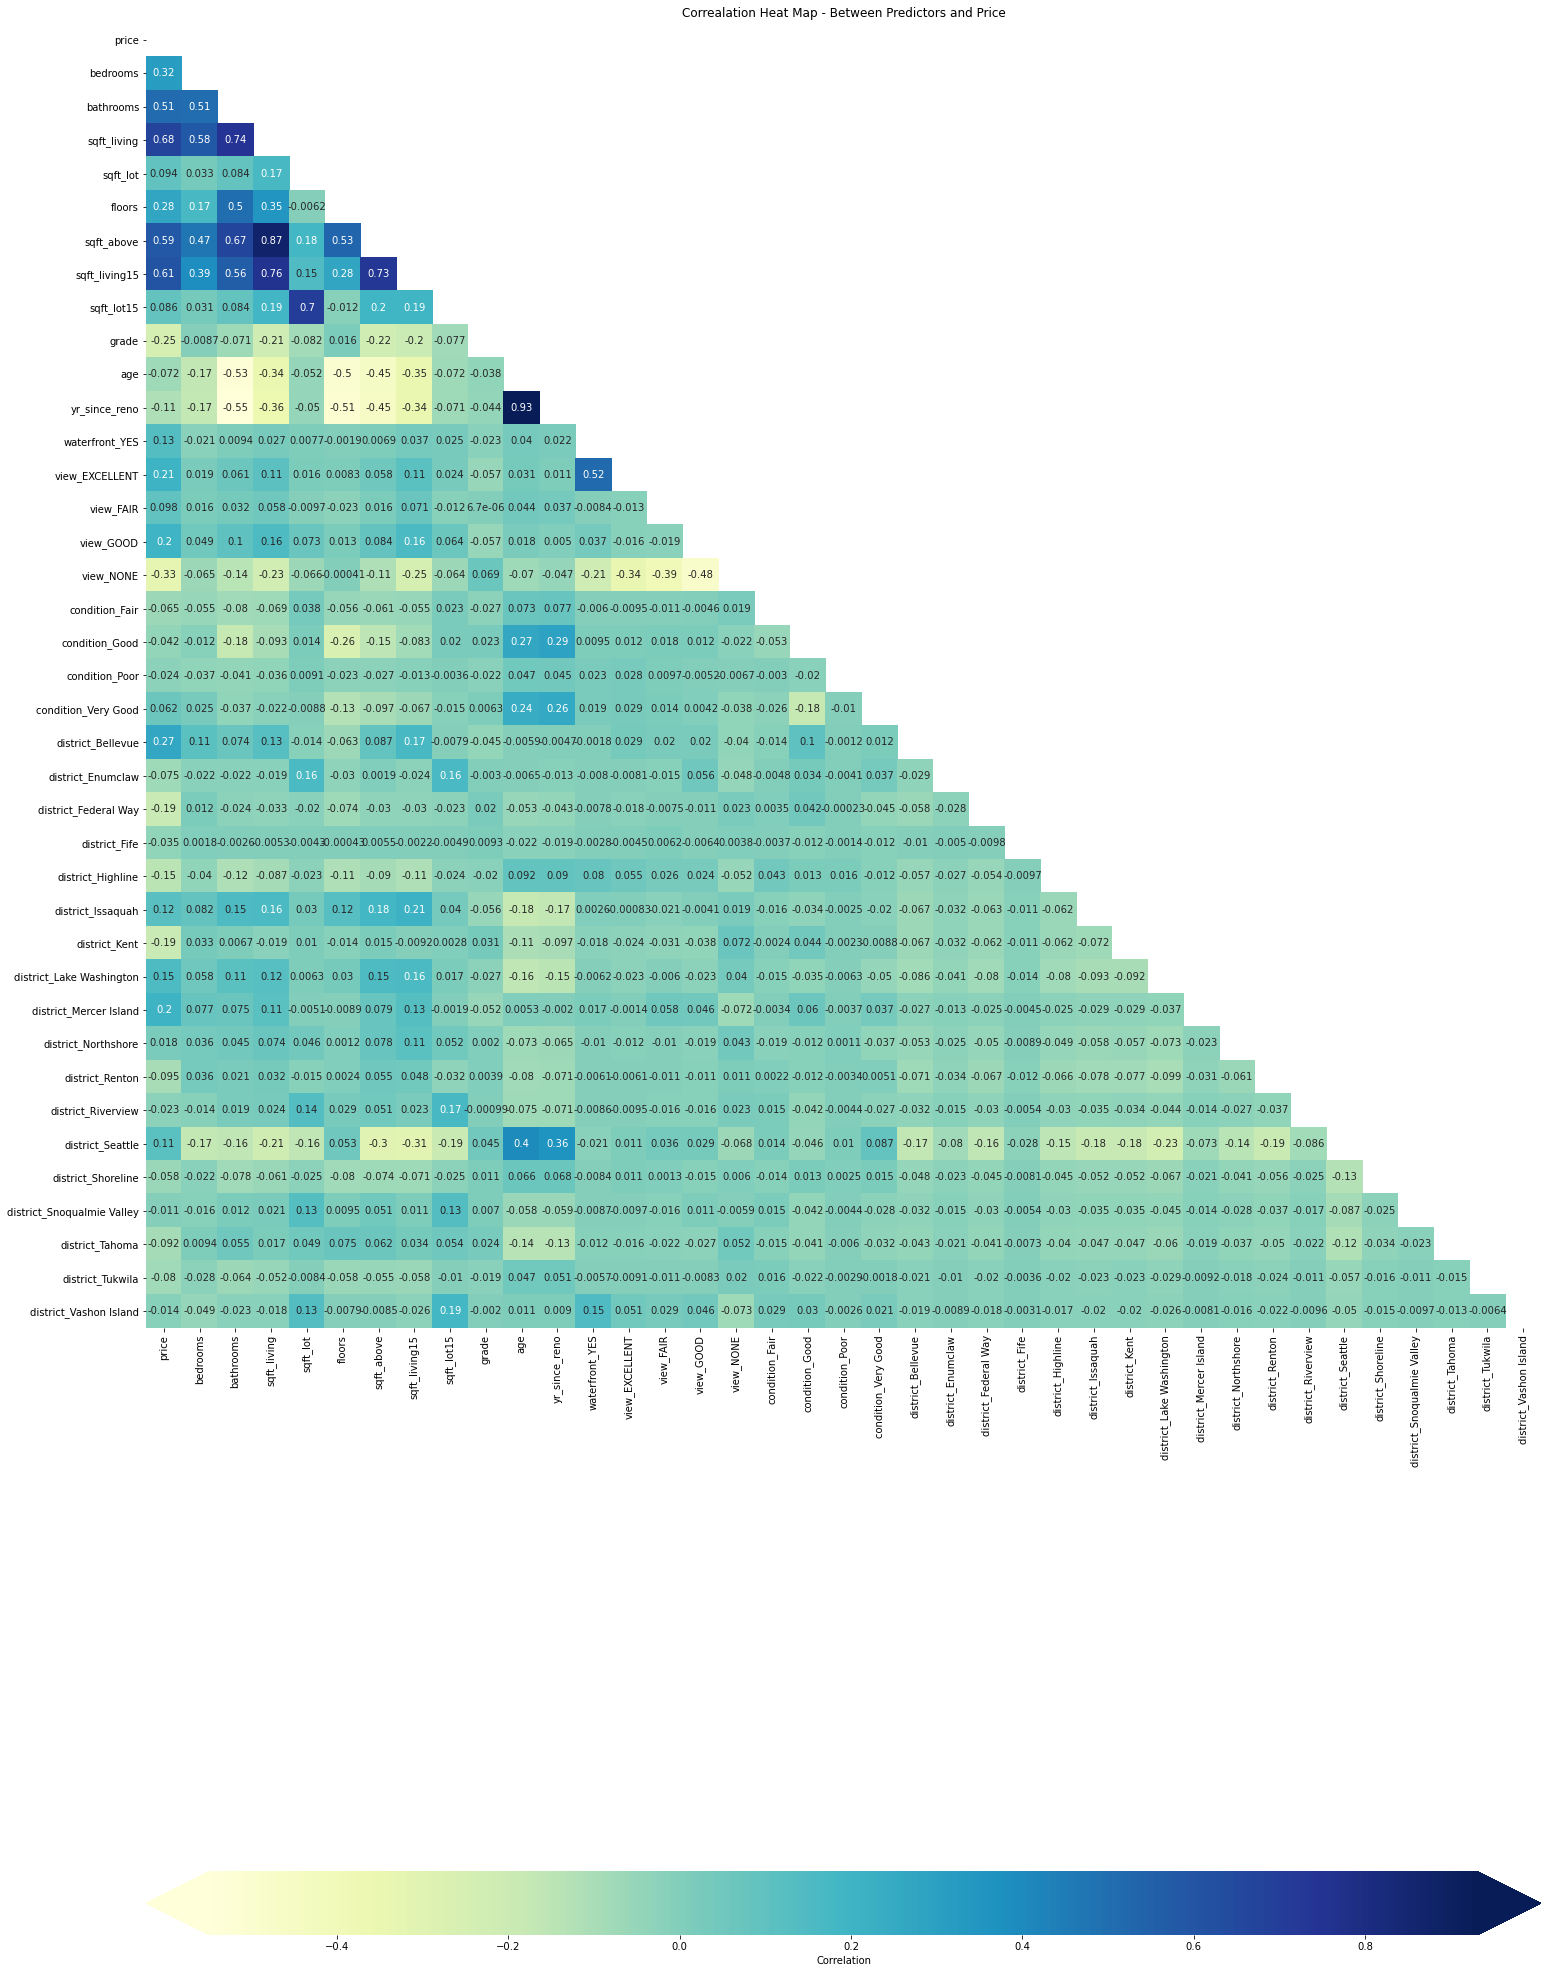

In [80]:
##heatmap
# y_Train needs to be first column in dataframe
hm_data = pd.concat([y_train, X_train], axis=1)
correlation = hm_data.corr()

fig, ax = plt.subplots(figsize=(25, 40))
sns.heatmap(correlation, cmap='YlGnBu',mask=np.triu(np.ones_like(correlation, dtype=bool)), ax=ax, annot=True,
           cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .25, "extend": "both"})
ax.set_title('Correalation Heat Map - Between Predictors and Price')

## Plot Most Correlated Feature


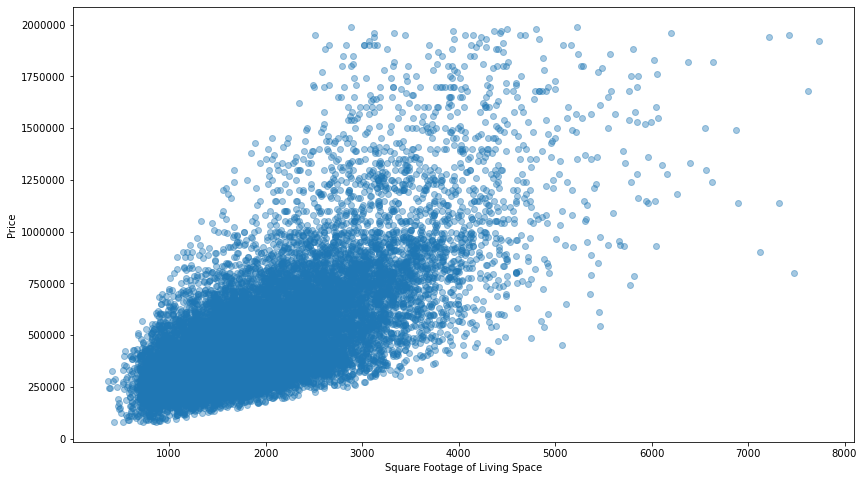

In [81]:
most_corr = 'sqft_living'
#scatter plot
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(X_train[most_corr], y_train, alpha=0.4)
ax.ticklabel_format(style='plain')
ax.set_ylabel('Price')
ax.set_xlabel('Square Footage of Living Space')
plt.show()

## Cross validate and Shuffle Split
This will run three splits 

In [82]:
#cross validate and shuffle split  get Train and test scores for 3 separate splits
from sklearn.model_selection import cross_validate, ShuffleSplit

bl_model = LinearRegression()
#set up the split 80/20
split = ShuffleSplit(n_splits=3, test_size=0.2, random_state=22)

baseline = cross_validate(
            estimator=bl_model,
            X=X_train[[most_corr]],
            y=y_train,
            return_train_score=True,
            cv=split
)
train = baseline['train_score'].mean()
test = baseline['test_score'].mean()
print('Baseline Train: {} \t Baseline Test: {}'.format(train,test))

Baseline Train: 0.46585754751237857 	 Baseline Test: 0.4544112474713442


Using only our most correlated feature of sqft_living we can account for roughly 46% of the price.
Can this count as a baseline model?

## Linear Regression
Running our first linear Regression Model.

We still have not addressed predictors that are corellated, we will do that during this phase.

### Model 1
We will use statsmodel Ordinary Least Squares (OLS)for our linear regressions.

In [83]:
#Importing
import statsmodels.api as sm

In [84]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1617.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:26:18   Log-Likelihood:            -2.8460e+05
No. Observations:               21389   AIC:                         5.693e+05
Df Residuals:                   21350   BIC:                         5.696e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -9.565e+04   1.12e+04     -8.520      0.000   -1.18e+05   -7.36e+04
bedrooms                   -1.976e+04   1401.598    -14.096      0.000   -2.25e+04    -1.7e+04
bathrooms                   3.321e+04   2405.682     13.804      0.000    2.85e+04    3.79e+04
sqft_living                  113.1303      3.259     34.717      0.000     106.743     119.517
sqft_lot                       0.2762      0.035      7.877      0.000       0.207       0.345
floors                      1.696e+04   2790.786      6.078      0.000    1.15e+04    2.24e+04
sqft_above                    54.5829      3.274     16.671      0.000      48.165      61.000
sqft_living15                 74.5891      2.523     29.564      0.000      69.644      79.534
sqft_lot15                    -0.1818      0.054     -3.365      0.001      -0.288      -0.076
grade                      -1.105e+04    576.244    -19.172      0.000   -1.22e+04   -9918.134
age                         1742.2650     94.618     18.414      0.000    1556.806    1927.724
yr_since_reno               -990.5104     96.736    -10.239      0.000   -1180.120    -800.901
waterfront_YES              2.827e+05   1.73e+04     16.312      0.000    2.49e+05    3.17e+05
view_EXCELLENT              1.587e+05   1.18e+04     13.412      0.000    1.36e+05    1.82e+05
view_FAIR                   9714.7840   9490.881      1.024      0.306   -8888.056    2.83e+04
view_GOOD                    6.65e+04   8223.471      8.087      0.000    5.04e+04    8.26e+04
view_NONE                  -6.522e+04   5055.899    -12.900      0.000   -7.51e+04   -5.53e+04
condition_Fair             -4.288e+04   1.14e+04     -3.769      0.000   -6.52e+04   -2.06e+04
condition_Good              2.501e+04   2568.065      9.740      0.000       2e+04       3e+04
condition_Poor              -1.08e+05   2.72e+04     -3.979      0.000   -1.61e+05   -5.48e+04
condition_Very Good         6.508e+04   4090.150     15.911      0.000    5.71e+04    7.31e+04
district_Bellevue           3.908e+05   7224.459     54.098      0.000    3.77e+05    4.05e+05
district_Enumclaw           1.345e+04   1.04e+04      1.293      0.196   -6940.263    3.38e+04
district_Federal Way        4838.4093   7240.661      0.668      0.504   -9353.830     1.9e+04
district_Fife                391.9989   2.46e+04      0.016      0.987   -4.79e+04    4.86e+04
district_Highline           7.758e+04   7382.622     10.508      0.000    6.31e+04    9.21e+04
district_Issaquah           1.924e+05   7004.167     27.466      0.000    1.79e+05    2.06e+05
district_Kent               1.966e+04   6937.433      2.834      0.005    6062.146    3.33e+04
district_Lake Washington    2.532e+05   6560.109     38.597      0.000     2.4e+05    2.66e+05
district_Mercer Island      4.947e+05   1.0

Our Initial Model has an Adjusted R-Squarred of 0.742 - this is a good start

We do have many predictors that do not meet our alpha requirement of 0.05.

We can drop those columns below.

'view_FAIR','district_Enumclaw','district_Federal Way','district_Fife',

### Model 2

In [85]:
#dropping columns
dropping = ['view_FAIR','district_Enumclaw', 'district_Federal Way', 'district_Fife']
            
df = df.drop(dropping, axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade,age,yr_since_reno,waterfront_YES,view_EXCELLENT,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1340,5650,7,61,61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1690,7639,7,65,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,2720,8062,6,83,83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1360,5000,7,51,51,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1800,7503,8,29,29,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [86]:
#recreate our X,y for the next model
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df['price'] # dataframe only price

In [87]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:26:27   Log-Likelihood:            -2.8460e+05
No. Observations:               21389   AIC:                         5.693e+05
Df Residuals:                   21354   BIC:                         5.696e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -8.836e+04   9761.421     -9.052      0.000   -1.07e+05   -6.92e+04
bedrooms                   -1.978e+04   1401.480    -14.111      0.000   -2.25e+04    -1.7e+04
bathrooms                    3.32e+04   2405.549     13.802      0.000    2.85e+04    3.79e+04
sqft_living                  113.0753      3.255     34.735      0.000     106.695     119.456
sqft_lot                       0.2783      0.035      7.950      0.000       0.210       0.347
floors                      1.689e+04   2789.898      6.055      0.000    1.14e+04    2.24e+04
sqft_above                    54.5915      3.270     16.696      0.000      48.183      61.000
sqft_living15                 74.5659      2.521     29.572      0.000      69.624      79.508
sqft_lot15                    -0.1795      0.054     -3.335      0.001      -0.285      -0.074
grade                      -1.104e+04    576.155    -19.167      0.000   -1.22e+04   -9913.957
age                         1745.1274     94.577     18.452      0.000    1559.749    1930.506
yr_since_reno               -993.8948     96.676    -10.281      0.000   -1183.387    -804.402
waterfront_YES              2.825e+05   1.73e+04     16.303      0.000    2.49e+05    3.16e+05
view_EXCELLENT              1.561e+05   1.16e+04     13.470      0.000    1.33e+05    1.79e+05
view_GOOD                   6.433e+04   7859.535      8.185      0.000    4.89e+04    7.97e+04
view_NONE                  -6.792e+04   4442.322    -15.289      0.000   -7.66e+04   -5.92e+04
condition_Fair              -4.29e+04   1.14e+04     -3.771      0.000   -6.52e+04   -2.06e+04
condition_Good              2.505e+04   2566.864      9.758      0.000       2e+04    3.01e+04
condition_Poor             -1.078e+05   2.71e+04     -3.971      0.000   -1.61e+05   -5.46e+04
condition_Very Good         6.525e+04   4080.953     15.988      0.000    5.72e+04    7.32e+04
district_Bellevue           3.865e+05   5384.034     71.785      0.000    3.76e+05    3.97e+05
district_Highline           7.325e+04   5577.586     13.132      0.000    6.23e+04    8.42e+04
district_Issaquah            1.88e+05   5122.915     36.701      0.000    1.78e+05    1.98e+05
district_Kent               1.527e+04   5024.346      3.040      0.002    5424.307    2.51e+04
district_Lake Washington    2.489e+05   4481.021     55.539      0.000     2.4e+05    2.58e+05
district_Mercer Island      4.906e+05   9770.576     50.214      0.000    4.71e+05     5.1e+05
district_Northshore          1.52e+05   5840.470     26.019      0.000    1.41e+05    1.63e+05
district_Renton             7.563e+04   4871.931     15.524      0.000    6.61e+04    8.52e+04
district_Riverview           1.08e+05   8523.681     12.671      0.000    9.13e+04    1.25e+05
district_Seattle            2.962e+05   409

No change in our R-squarred 0.742.  
All pvalues are good.


### Model 3

We know from earlier that we have issues with collinearity.  We need to check which features we should eliminate / modify. before running our next model.  we will identify the correlated pairs below.

In [88]:
## get correlation info
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade,age,yr_since_reno,waterfront_YES,view_EXCELLENT,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
id,1.000000,-0.012683,0.003492,0.009412,-0.007875,-0.132373,0.020205,-0.007430,0.001462,-0.138488,0.038222,-0.021990,-0.020658,0.000376,0.027750,-0.011765,-0.016833,-0.013423,-0.025224,0.003415,-0.009734,-0.005046,-0.010177,0.013988,-0.006509,0.010415,-0.013976,-0.034944,0.040699,-0.033737,0.015938,0.004445,0.004142,-0.028779,-0.033852,-0.033985
price,-0.012683,1.000000,0.316763,0.508470,0.679490,0.098013,0.278638,0.584374,0.601513,0.088028,-0.246317,-0.063376,-0.103938,0.141032,0.207488,0.191955,-0.324801,-0.063574,-0.035338,-0.022890,0.060518,0.268731,-0.146272,0.114619,-0.189692,0.149895,0.212618,0.017278,-0.095702,-0.018897,0.115371,-0.054992,-0.012842,-0.094010,-0.079552,-0.007651
bedrooms,0.003492,0.316763,1.000000,0.507305,0.582001,0.032279,0.171192,0.472812,0.386036,0.029788,-0.008210,-0.159501,-0.166724,-0.022779,0.015598,0.044845,-0.064585,-0.049608,-0.009286,-0.032501,0.024384,0.111143,-0.036538,0.082057,0.032439,0.053940,0.078627,0.035381,0.033062,-0.011485,-0.166235,-0.021657,-0.017612,0.008532,-0.026732,-0.047210
bathrooms,0.009412,0.508470,0.507305,1.000000,0.742483,0.085698,0.505603,0.669312,0.555659,0.084927,-0.069483,-0.523571,-0.546592,0.015983,0.061193,0.103566,-0.145434,-0.077139,-0.170920,-0.043633,-0.039315,0.075195,-0.112365,0.154355,0.007854,0.106387,0.077117,0.046150,0.021499,0.028952,-0.160173,-0.073736,0.008921,0.054024,-0.066794,-0.018772
sqft_living,-0.007875,0.679490,0.582001,0.742483,1.000000,0.175116,0.353611,0.867797,0.754547,0.185472,-0.209076,-0.338703,-0.355077,0.032528,0.106713,0.151624,-0.232000,-0.067693,-0.087482,-0.034357,-0.025194,0.130942,-0.082449,0.158430,-0.020729,0.120370,0.115716,0.073915,0.031094,0.030890,-0.215134,-0.057193,0.016105,0.014170,-0.054021,-0.013659
sqft_lot,-0.132373,0.098013,0.032279,0.085698,0.175116,1.000000,-0.007465,0.184227,0.146005,0.713364,-0.082584,-0.051824,-0.050635,0.020010,0.014273,0.074326,-0.067158,0.038693,0.014660,0.006467,-0.014075,-0.012646,-0.023131,0.028737,0.010297,0.004294,-0.004802,0.047229,-0.012537,0.140975,-0.162282,-0.026118,0.135924,0.043006,-0.008321,0.147169
floors,0.020205,0.278638,0.171192,0.505603,0.353611,-0.007465,1.000000,0.528690,0.276626,-0.013053,0.012518,-0.496041,-0.506495,0.006919,0.012023,0.015862,-0.003874,-0.055732,-0.259558,-0.022920,-0.124447,-0.062044,-0.112447,0.119574,-0.013915,0.030271,-0.001974,-0.002028,0.006212,0.036097,0.050644,-0.079383,0.004015,0.072573,-0.055223,-0.011031
sqft_above,-0.007430,0.584374,0.472812,0.669312,0.867797,0.184227,0.528690,1.000000,0.727492,0.194465,-0.220453,-0.443399,-0.448996,0.014902,0.054935,0.083032,-0.115972,-0.060210,-0.147773,-0.027604,-0.096731,0.089932,-0.087768,0.183910,0.011811,0.150763,0.085014,0.077188,0.055198,0.059439,-0.299350,-0.070038,0.044912,0.057735,-0.054331,-0.007557
sqft_living15,0.001462,0.601513,0.386036,0.555659,0.754547,0.146005,0.276626,0.727492,1.000000,0.183783,-0.195887,-0.337872,-0.332642,0.041645,0.115340,0.154501,-0.245893,-0.053446,-0.076107,-0.008993,-0.068819,0.174123,-0.110295,0.209508,-0.011557,0.160372,0.142446,0.109668,0.045110,0.028667,-0.306929,-0.070595,0.006794,0.031946,-0.057820,-0.021790
sqft_lot15,-0.138488,0.088028,0.029788,0.084927,0.185472,0.713364,-0.013053,0.194465,0.183783,1.000000,-0.077694,-0.069454,-0.067918,0.028138,0.020401,0.063953,-0.062737,0.022751,0.021660,-0.004328,-0.017037,-0.005760,-0.023908,0.038370,0.001972,0.013966,-0.001016,0.053399,-0.029317,0.174944,-0.189882,-0.025765,0.137412,0.049177,-0.009503,

We still have a lot of predictors scatterplots will be small. 
We want to find high correlations and create pairs but first lets create a binary table to get a rough idea

Results displayed are from -1 to 1.  This is the range from perfect negatvie linear relationship to perfect positive linear relationship.

Getting the absolute value and testing if it is greater than 0.7.

In [89]:
#return binary result if above .7
abs(df.corr()) > 0.7

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,grade,age,yr_since_reno,waterfront_YES,view_EXCELLENT,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot15,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Looks like we can identify from the table above and from our previous suspiscions that 
sqft_living is paired with sqft_above	sqft_living15
sqft_lot is paired with sqft_lot15
age and yr_since_renovation

We will keep 'sqft_living' and 'sqft_lot'

dropping 'sqft_above', 'sqft_living15', 'sqft_lot15', 'yr_since_reno'

In [90]:
dropping = ['sqft_above', 'sqft_living15', 'sqft_lot15','yr_since_reno']
df = df.drop(dropping, axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,age,waterfront_YES,view_EXCELLENT,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
0,7129300520,221900.0,3,1.00,1180,5650,1.0,7,61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,7,65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,6,83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,7,51,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,8,29,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
#recreate our X,y for the next model
X = df.drop(['price','id'],axis=1) #dataframe without price, id
y = df['price'] # dataframe only price

In [92]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1873.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:26:40   Log-Likelihood:            -2.8531e+05
No. Observations:               21389   AIC:                         5.707e+05
Df Residuals:                   21358   BIC:                         5.709e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -547.9361   9386.465     -0.058      0.953   -1.89e+04    1.79e+04
bedrooms                   -2.445e+04   1440.591    -16.975      0.000   -2.73e+04   -2.16e+04
bathrooms                   2.855e+04   2434.927     11.727      0.000    2.38e+04    3.33e+04
sqft_living                  192.4508      2.096     91.840      0.000     188.343     196.558
sqft_lot                       0.2206      0.027      8.206      0.000       0.168       0.273
floors                      4.467e+04   2494.819     17.903      0.000    3.98e+04    4.96e+04
grade                      -1.281e+04    588.753    -21.761      0.000    -1.4e+04   -1.17e+04
age                          917.6447     54.124     16.954      0.000     811.557    1023.732
waterfront_YES              2.814e+05   1.79e+04     15.717      0.000    2.46e+05    3.16e+05
view_EXCELLENT              1.636e+05    1.2e+04     13.678      0.000     1.4e+05    1.87e+05
view_GOOD                   6.735e+04   8111.608      8.303      0.000    5.14e+04    8.32e+04
view_NONE                  -7.882e+04   4533.887    -17.384      0.000   -8.77e+04   -6.99e+04
condition_Fair             -4.946e+04   1.17e+04     -4.210      0.000   -7.25e+04   -2.64e+04
condition_Good              1.462e+04   2613.311      5.593      0.000    9493.466    1.97e+04
condition_Poor             -9.064e+04    2.8e+04     -3.232      0.001   -1.46e+05   -3.57e+04
condition_Very Good         4.697e+04   4152.188     11.313      0.000    3.88e+04    5.51e+04
district_Bellevue           4.051e+05   5505.021     73.580      0.000    3.94e+05    4.16e+05
district_Highline           5.634e+04   5741.787      9.813      0.000    4.51e+04    6.76e+04
district_Issaquah           2.089e+05   5239.673     39.867      0.000    1.99e+05    2.19e+05
district_Kent               2.058e+04   5187.312      3.967      0.000    1.04e+04    3.07e+04
district_Lake Washington    2.635e+05   4603.119     57.250      0.000    2.55e+05    2.73e+05
district_Mercer Island      5.197e+05      1e+04     51.830      0.000       5e+05    5.39e+05
district_Northshore         1.667e+05   6002.583     27.765      0.000    1.55e+05    1.78e+05
district_Renton             8.204e+04   5021.092     16.340      0.000    7.22e+04    9.19e+04
district_Riverview          1.109e+05   8770.738     12.649      0.000    9.38e+04    1.28e+05
district_Seattle            2.691e+05   4116.246     65.377      0.000    2.61e+05    2.77e+05
district_Shoreline          1.609e+05   6335.199     25.391      0.000    1.48e+05    1.73e+05
district_Snoqualmie Valley  1.413e+05   8633.382     16.361      0.000    1.24e+05    1.58e+05
district_Tahoma             3.917e+04   6860.258      5.710      0.000    2.57e+04    5.26e+04
district_Tukwila            3.662e+04   1.2

#### We now have a model that has an R-Squarred of 0.724 and all p-values are below are alpha of 0.05
Currently we can confidently say that are model can account for 70% of the variance in housing prices.

Can we do better?




### Model 4

Now lets see if using log transformations on some of our continous predictors helps our model out.

we will need to see look at scatter plots of our suspected predictors

In [94]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,age,waterfront_YES,view_EXCELLENT,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
0,7129300520,221900.0,3,1.00,1180,5650,1.0,7,61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,7,65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,6,83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,7,51,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,8,29,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Normality Assumption: Checking Residuals With a qqplot
The qq plot will lew us know if our residuals follow a normal distribution



<ipython-input-95-8c4a1944e451>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


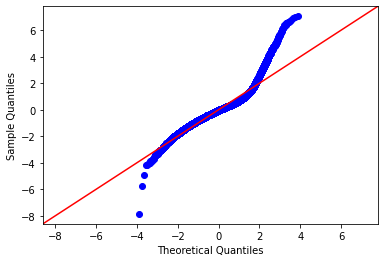

In [95]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Residuals are not normal in this case.  We possibly need to log transform our target.

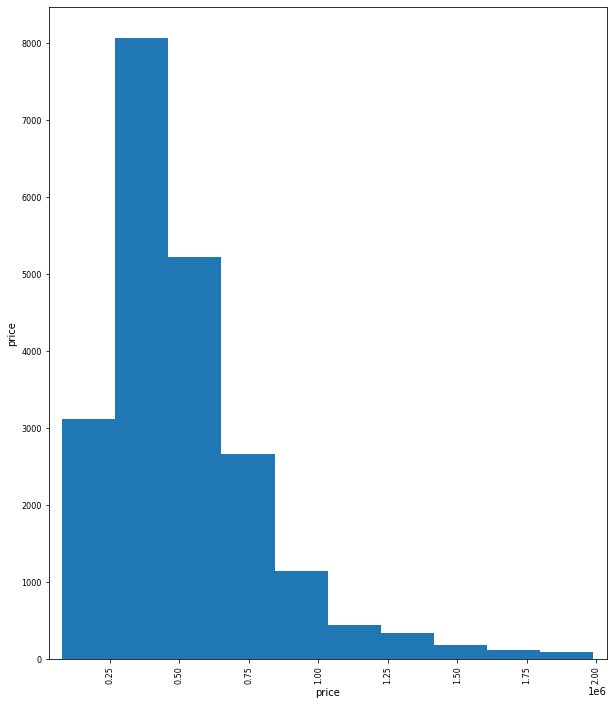

In [96]:
#lets look at 
x_nums=['price']
pd.plotting.scatter_matrix(df[x_nums], figsize=(10,12));

lets start with log Transforming all of the numeric predictors


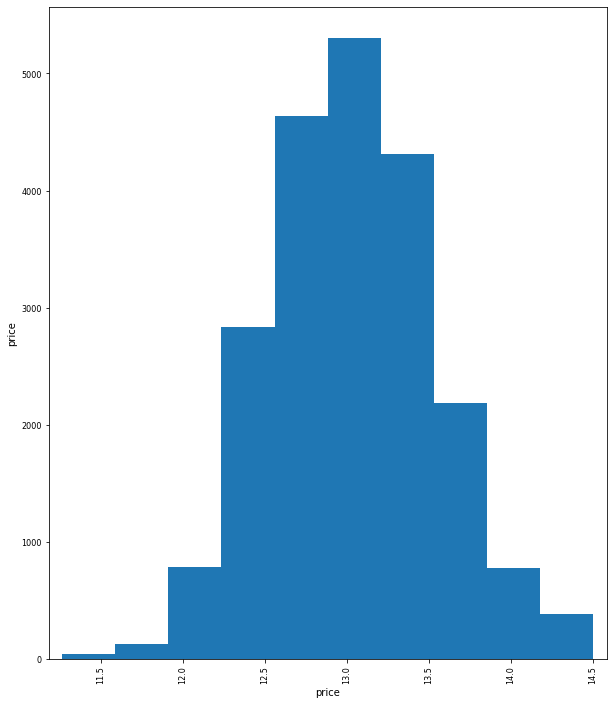

In [97]:
# I left the loop in because I may need to add columns later...
df_logged = df.copy()
for col in x_nums:
    df_logged[col] = df_logged[col].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df_logged[x_nums], figsize=(10,12));

The log transformation meets the normality assumption as seen in the histogram.

rerun the OLS

In [98]:
df_logged.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,age,waterfront_YES,view_EXCELLENT,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Tukwila,district_Vashon Island
0,7129300520,12.309982,3,1.00,1180,5650,1.0,7,61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6414100192,13.195614,3,2.25,2570,7242,2.0,7,65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5631500400,12.100712,2,1.00,770,10000,1.0,6,83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2487200875,13.311329,4,3.00,1960,5000,1.0,7,51,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1954400510,13.142166,3,2.00,1680,8080,1.0,8,29,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [99]:
#recreate our X,y for the next model
X = df_logged.drop(['price','id'],axis=1) #dataframe without price, id
y = df_logged['price'] # dataframe only price

In [100]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # displat summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     2218.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:28:52   Log-Likelihood:                -377.76
No. Observations:               21389   AIC:                             817.5
Df Residuals:                   21358   BIC:                             1065.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.7788      0.015    765.568      0.000      11.749      11.809
bedrooms                      -0.0303      0.002    -12.837      0.000      -0.035      -0.026
bathrooms                      0.0559      0.004     14.004      0.000       0.048       0.064
sqft_living                    0.0003   3.43e-06     94.422      0.000       0.000       0.000
sqft_lot                    6.164e-07   4.41e-08     13.989      0.000     5.3e-07    7.03e-07
floors                         0.0782      0.004     19.122      0.000       0.070       0.086
grade                          0.0079      0.001      8.156      0.000       0.006       0.010
age                            0.0012   8.87e-05     13.689      0.000       0.001       0.001
waterfront_YES                 0.3662      0.029     12.479      0.000       0.309       0.424
view_EXCELLENT                 0.1638      0.020      8.356      0.000       0.125       0.202
view_GOOD                      0.0513      0.013      3.860      0.000       0.025       0.077
view_NONE                     -0.1331      0.007    -17.907      0.000      -0.148      -0.119
condition_Fair                -0.2017      0.019    -10.477      0.000      -0.239      -0.164
condition_Good                 0.0364      0.004      8.508      0.000       0.028       0.045
condition_Poor                -0.3106      0.046     -6.758      0.000      -0.401      -0.221
condition_Very Good            0.0844      0.007     12.403      0.000       0.071       0.098
district_Bellevue              0.7919      0.009     87.758      0.000       0.774       0.810
district_Highline              0.1314      0.009     13.967      0.000       0.113       0.150
district_Issaquah              0.5390      0.009     62.754      0.000       0.522       0.556
district_Kent                  0.0685      0.009      8.057      0.000       0.052       0.085
district_Lake Washington       0.6292      0.008     83.395      0.000       0.614       0.644
district_Mercer Island         0.8996      0.016     54.738      0.000       0.867       0.932
district_Northshore            0.4681      0.010     47.575      0.000       0.449       0.487
district_Renton                0.2486      0.008     30.203      0.000       0.232       0.265
district_Riverview             0.3191      0.014     22.196      0.000       0.291       0.347
district_Seattle               0.6243      0.007     92.533      0.000       0.611       0.638
district_Shoreline             0.4279      0.010     41.202      0.000       0.408       0.448
district_Snoqualmie Valley     0.3637      0.014     25.698      0.000       0.336       0.391
district_Tahoma                0.1520      0.011     13.521      0.000       0.130       0.174
district_Tukwila               0.0089      

###### Model 6 - Adjusted R-squarred improved to .757
bad pvalues - district_Tukwila

##  Model 7

'district_Tukwila'

In [101]:
df_logged = df_logged.drop(['district_Tukwila'],axis=1)
df_logged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21389 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21389 non-null  int64  
 1   price                       21389 non-null  float64
 2   bedrooms                    21389 non-null  int64  
 3   bathrooms                   21389 non-null  float64
 4   sqft_living                 21389 non-null  int64  
 5   sqft_lot                    21389 non-null  int64  
 6   floors                      21389 non-null  float64
 7   grade                       21389 non-null  int64  
 8   age                         21389 non-null  int64  
 9   waterfront_YES              21389 non-null  uint8  
 10  view_EXCELLENT              21389 non-null  uint8  
 11  view_GOOD                   21389 non-null  uint8  
 12  view_NONE                   21389 non-null  uint8  
 13  condition_Fair              213

In [102]:
#recreate our X,y for the next model
X = df_logged.drop(['price','id'],axis=1) #dataframe without price, id
y = df_logged['price'] # dataframe only price

In [103]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:29:03   Log-Likelihood:                -377.85
No. Observations:               21389   AIC:                             815.7
Df Residuals:                   21359   BIC:                             1055.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.7794      0.015    769.324      0.000      11.749      11.809
bedrooms                      -0.0303      0.002    -12.838      0.000      -0.035      -0.026
bathrooms                      0.0559      0.004     14.001      0.000       0.048       0.064
sqft_living                    0.0003   3.43e-06     94.424      0.000       0.000       0.000
sqft_lot                     6.16e-07   4.41e-08     13.983      0.000     5.3e-07    7.02e-07
floors                         0.0782      0.004     19.124      0.000       0.070       0.086
grade                          0.0079      0.001      8.149      0.000       0.006       0.010
age                            0.0012   8.85e-05     13.756      0.000       0.001       0.001
waterfront_YES                 0.3662      0.029     12.478      0.000       0.309       0.424
view_EXCELLENT                 0.1638      0.020      8.358      0.000       0.125       0.202
view_GOOD                      0.0513      0.013      3.859      0.000       0.025       0.077
view_NONE                     -0.1331      0.007    -17.905      0.000      -0.148      -0.118
condition_Fair                -0.2017      0.019    -10.477      0.000      -0.239      -0.164
condition_Good                 0.0363      0.004      8.499      0.000       0.028       0.045
condition_Poor                -0.3105      0.046     -6.756      0.000      -0.401      -0.220
condition_Very Good            0.0843      0.007     12.397      0.000       0.071       0.098
district_Bellevue              0.7913      0.009     88.724      0.000       0.774       0.809
district_Highline              0.1308      0.009     14.089      0.000       0.113       0.149
district_Issaquah              0.5384      0.008     63.444      0.000       0.522       0.555
district_Kent                  0.0679      0.008      8.093      0.000       0.051       0.084
district_Lake Washington       0.6287      0.007     84.727      0.000       0.614       0.643
district_Mercer Island         0.8990      0.016     54.886      0.000       0.867       0.931
district_Northshore            0.4675      0.010     47.989      0.000       0.448       0.487
district_Renton                0.2480      0.008     30.576      0.000       0.232       0.264
district_Riverview             0.3185      0.014     22.253      0.000       0.290       0.347
district_Seattle               0.6237      0.007     95.107      0.000       0.611       0.637
district_Shoreline             0.4272      0.010     41.588      0.000       0.407       0.447
district_Snoqualmie Valley     0.3631      0.014     25.778      0.000       0.335       0.391
district_Tahoma                0.1515      0.011     13.566      0.000       0.130       0.173
district_Vashon Island         0.2992      

model 7 adjusted r-squarred is .757

75.7% of the variance in price are explained by the predictors of our model

drop high pvalues 'bathrooms_4.25'

## Model 8

explore bedrooms a negative coefficient seems odd.


In [104]:
df_logged['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

that 33 bedroom house is probably causing some issues.  
lets see if it is just one and drop it

In [107]:
df_logged[df_logged['bedrooms'] >= 33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,age,waterfront_YES,view_EXCELLENT,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,district_Bellevue,district_Highline,district_Issaquah,district_Kent,district_Lake Washington,district_Mercer Island,district_Northshore,district_Renton,district_Riverview,district_Seattle,district_Shoreline,district_Snoqualmie Valley,district_Tahoma,district_Vashon Island
15856,2402100895,13.369223,33,1.75,1620,6000,1.0,7,69,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [109]:
df_brfix = df_logged[df_logged['bedrooms'] < 33].copy()
df_brfix['bedrooms'].unique()


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [111]:
#recreate our X,y for the next model
X = df_brfix.drop(['price','id'],axis=1) #dataframe without price, id
y = df_brfix['price'] # dataframe only price

In [112]:
#list of predictor columns
X_int = sm.add_constant(X)  #add a constant
model = sm.OLS(y,X_int).fit()  # fit the model
model.summary()  # display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     2298.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:32:30   Log-Likelihood:                -366.00
No. Observations:               21388   AIC:                             792.0
Df Residuals:                   21358   BIC:                             1031.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.7829      0.015    769.172      0.000      11.753      11.813
bedrooms                      -0.0338      0.002    -13.729      0.000      -0.039      -0.029
bathrooms                      0.0570      0.004     14.269      0.000       0.049       0.065
sqft_living                    0.0003   3.45e-06     94.458      0.000       0.000       0.000
sqft_lot                    6.112e-07    4.4e-08     13.879      0.000    5.25e-07    6.98e-07
floors                         0.0781      0.004     19.102      0.000       0.070       0.086
grade                          0.0081      0.001      8.354      0.000       0.006       0.010
age                            0.0012   8.85e-05     13.971      0.000       0.001       0.001
waterfront_YES                 0.3652      0.029     12.452      0.000       0.308       0.423
view_EXCELLENT                 0.1633      0.020      8.335      0.000       0.125       0.202
view_GOOD                      0.0509      0.013      3.834      0.000       0.025       0.077
view_NONE                     -0.1324      0.007    -17.830      0.000      -0.147      -0.118
condition_Fair                -0.2018      0.019    -10.488      0.000      -0.240      -0.164
condition_Good                 0.0365      0.004      8.534      0.000       0.028       0.045
condition_Poor                -0.3112      0.046     -6.775      0.000      -0.401      -0.221
condition_Very Good            0.0837      0.007     12.313      0.000       0.070       0.097
district_Bellevue              0.7913      0.009     88.773      0.000       0.774       0.809
district_Highline              0.1307      0.009     14.083      0.000       0.112       0.149
district_Issaquah              0.5380      0.008     63.431      0.000       0.521       0.555
district_Kent                  0.0681      0.008      8.120      0.000       0.052       0.085
district_Lake Washington       0.6282      0.007     84.700      0.000       0.614       0.643
district_Mercer Island         0.8990      0.016     54.914      0.000       0.867       0.931
district_Northshore            0.4671      0.010     47.967      0.000       0.448       0.486
district_Renton                0.2478      0.008     30.575      0.000       0.232       0.264
district_Riverview             0.3178      0.014     22.212      0.000       0.290       0.346
district_Seattle               0.6226      0.007     94.947      0.000       0.610       0.635
district_Shoreline             0.4270      0.010     41.586      0.000       0.407       0.447
district_Snoqualmie Valley     0.3624      0.014     25.741      0.000       0.335       0.390
district_Tahoma                0.1512      0.011     13.549      0.000       0.129       0.173
district_Vashon Island         0.2980      

##### Final Model Results
R- Squarred .757
Our final model can predict roughly 76% of the variation in the price of a home, in King County Wa.

Dropping that bedroom outlier did ont have a big effect on the data and bedrooms still has a negative coefficient.

#### Coefficients
lets look at the coefficients
const 12.417

In [115]:
coef_df = pd.DataFrame(model.params)
coef_df = coef_df.drop('const')

In [116]:
##sort data by absolute value 
#Top 5 predictors that lower the price
coef_df.sort_values(0).head(10)

,0
condition_Poor,-3.112433e-01
condition_Fair,-2.018428e-01
view_NONE,-1.324490e-01
bedrooms,-3.381544e-02
sqft_lot,6.112378e-07
sqft_living,3.261698e-04
age,1.236651e-03
grade,8.062314e-03
condition_Good,3.645427e-02
view_GOOD,5.094934e-02


## Predictors That Negatively Affect Price
It appears that having a grade between 4-8 are the greatest factors in lowering the price of a house

In [117]:
##sort data by absolute value
#Top 5 predictors that lower the price
coef_df.sort_values(0).tail(10)

,0
district_Riverview,0.317784
district_Snoqualmie Valley,0.362387
waterfront_YES,0.365202
district_Shoreline,0.426970
district_Northshore,0.467058
district_Issaquah,0.538022
district_Seattle,0.622596
district_Lake Washington,0.628162
district_Bellevue,0.791303
district_Mercer Island,0.898978


## Predictors That Positively Affect Price
Being a part of Mercer Island, Bellevue, Seattle and Lake Washington as well as being a grade_13 Mansion are the biggest predictors of price. 

Other school districts as well as sqft_living round out the top 10.

## Predictors Value Based On Coeff


In [ ]:
#create a column for absolute value in orde to rank overall impact
coef_df['abs_coef'] = coef_df.apply(lambda x: abs(x[0]), axis=1)
coef_df.sort_values('abs_coef', ascending = False)

## Evaluating the Coefficients

### Numerical Coefficients 
**age** - for every year older a house is .12%  

**sqft_living** - for each additional sqft of living space a houses value would increase .03% 

ex: A house that is 100 sqft larger would have a predicted price that is 3% higher

**sqft_lt** - for each additional sqft of the lot a house value would increase .0000006

   very littel impact

**floors** for each additional floor a houses value would rise 7%

**bathrooms** for each additional bathroom a houses value would rise 5%

**bedrooms** for each additional bedroom a houses value drops 3% (may need to look into this most likely an an outlier)

**grade** For each grade increase value increases .7%




Fife School district was most likely eliminated because the majority of houses fall outside of King County.  For this same reason our clients should not focus on that district.  

Federal way may be a district for our clients to consider.  It makes up all or close to all of zipcodes 98023, 98003. As well as the majority of 98001 and a good portion of 98032, 98198.

## Looking at Grade_13 Mansion Houses

In [ ]:
#how many Grade_13 Mansions
df[df['grade_13 Mansion']==1]

I am not sure how this was such a great factor if only one house has this box checked.

# Interpret
_____

## Final Model
Our Final Model had an Adjusted R-Squarred of .757, which meets our goal of 75%. This means that 75.7% of the variance in price is explained by our model. We feel that time spent improving the model would not lead to much more insight.  All predictor p values meet our .005 alpha requirement.  This is a sign that they are good predictors of the price of a home.  There are many strong coefficients from our predictors which will allow us to confidently answer our clients questions below.


## Client Questions

1. What are the leading predictors of a houses sale price?

2. What effect does school district have on the sale price of a house?

3. Which school districts would be good places for EdConsult to target?


### Leading Predictors of a Houses Sale Price

Square Footage 3% for each additional 100 sq ft
Bathrooms 5% for each additional Bathroom
Floors 7% for each additional Floor 


Non School District Categoric Predictors
Being on the waterfront adds 37%	
Having an view_EXCELLENT	16%
 
School District - Coefficents listed below



### How School District Affects Sale Price

To show the effect on the School District Price we will use Coefficients from our OLS Model



1. Mercer Island 90%
2. Bellevue	79%
3. Lake Washington:	63%			
4. Seattle: 62% 
5. Issaquah:	54% 	
6. Northshore:	47%		
7. Shoreline:	43%	
8. Snoqualmie Valley:	36%	
9. Riverview:	32%	
10. Vashon Island:	30%
11. Renton:	25%	
12. Tahoma:	15%
13. Highline:	13%
14. Kent  7%
14. Enumclaw: 0
15. Tukwila:	0
16. Federeal Way: 0
17. Fife: 0 
18. Auburn: 0 baseline district







In [130]:
## lets chart this for the presentation
dist_coef_df = pd.DataFrame({'District': ['Mercer Island','Bellevue','Lake Washington','Seattle',
                               'Issaquah','Northshore','Shoreline','Snoqualmie Valley',
                              'Riverview', 'Vashon Island','Renton','Tahoma','Highline','Kent',
                              'Enumclaw','Tukwila','Federal Way','Fife','Auburn'],
           'Percent': [90,79,63,62,54,47,43,36,32,30,25,15,13,7,0,0,0,0,0 ]})

dist_coef_df





,District,Percent
0,Mercer Island,90
1,Bellevue,79
2,Lake Washington,63
3,Seattle,62
4,Issaquah,54
5,Northshore,47
6,Shoreline,43
7,Snoqualmie Valley,36
8,Riverview,32
9,Vashon Island,30


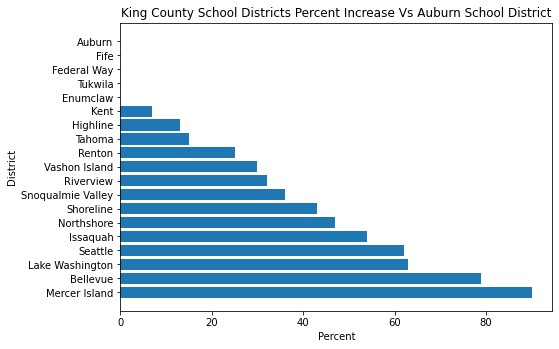

In [141]:
##plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xs = dist_coef_df['District']
ys = dist_coef_df['Percent']
ax.barh(xs,ys )
plt.title('King County School Districts Percent Increase Vs Auburn School District')
plt.ylabel('District')
plt.xlabel('Percent')
plt.show()



## Average Home Price for Each District

In [118]:
## get the average sale price of homes for each district
kc_df_no_outliers.groupby('district')['price'].mean().nlargest(20)

district
Mercer Island        1.066568e+06
Bellevue             8.309092e+05
Lake Washington      6.426917e+05
Issaquah             6.408661e+05
Seattle              5.680276e+05
Northshore           5.423131e+05
Snoqualmie Valley    4.908943e+05
Vashon Island        4.893820e+05
Riverview            4.770309e+05
Shoreline            4.386822e+05
Renton               4.225934e+05
Tahoma               3.651757e+05
Highline             3.368813e+05
Enumclaw             3.324402e+05
Kent                 3.151135e+05
Auburn               2.970239e+05
Fife                 2.923739e+05
Federal Way          2.859120e+05
Tukwila              2.451457e+05
Name: price, dtype: float64

<AxesSubplot:title={'center':'Average Home Price By District'}, ylabel='District'>

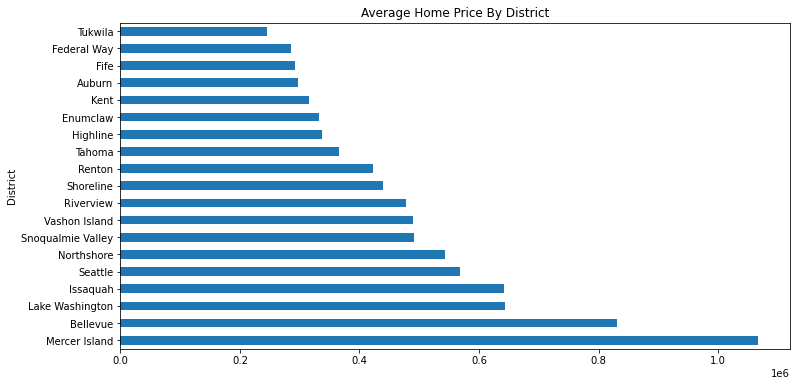

In [119]:
#create bar chart for slides
bar_df = pd.DataFrame(kc_df_no_outliers.groupby('district')['price'].mean().nlargest(20))
bar_df.plot(kind='barh', title="Average Home Price By District", xlabel ='District', ylabel='Price in Millions',figsize=(12,6),legend=False)
#plt.show()

### Which School Districts To Target
EdConsult should target districts with coefficients in the middle of our model.  These are the areas of King County where they can have the most impact in the upcomming election.

The Top Districts will probably be least affected by their campaign efforts to improve schools by improving the value of their homes.  

The Bottom Districts will most likely be a tough sell but would be better selection than top.  

The Middle Districts show the most promise because their coefficient already suggest that living in the district adds a good amount of value to the home.  

Remember we already eliminated Fife School District based on being mostly out of King County.  And Federal would fall just after Kent.

It is our reccomendation that EdConsult focuses on 
**Snoqualmie Valley, Vashon Island,Riverview,Shoreline, Renton** during this next election cycle.  Or at least use this group to start narrowing down based on further study. For the good of the county as a whole winning elections in these districts is key.  In following elections the middle group will ideally change as school districts improve. 
